# Projet P2 : Analysez des données de systèmes éducatifs

## Contexte

Vous êtes <b> Data Scientist </b> dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

<h4> Votre mission </h4> 
Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :

Hello,
Les données sont disponibles sur ce site de la Banque mondiale.
Ou en téléchargement direct à ce lien.

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4 000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site.

Pour la pré-analyse, pourrais-tu :
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

## Etapes du projet :

Identifier les pays les plus adaptés à un développement commercial.

<h4> Etape préliminaire : Importation des données et description des fichiers </h4>
- Fait une description précise de chaque fichier de données : nombre de lignes, nombre de colonnes, type des différentes colonnes, etc.

<h4> Etape 1 : analyse générale des données et nettoyage </h4>

- Filtrer plusieurs fois le jeu de données 
- Comprendre les blocs de variables à notre dispo --> voir sur le site

<h4> Etape 2 : qualité des données et selection des données pertinentes </h4>

- Données anciennes et prospectives (futures) / Pas nécessaire de tout garder
- Retirer certains pays = trop petits (Le tx de remplissage par pays varie)
- Quelles sont les variables permettant de quantifier le potentiel d’un pays ?
- Identifier au moins 4 variables en lien avec l’étude
- validé la qualité du jeu de données: vérifier s’il y a des données qui manquent ou qui sont dupliquées

S’assurer que pour les 3-4 variables selectionnées le remplissage est ok pour les pays. 

<h4> Etape 3 : analyse de données </h4> 

- avant l'analyse, je dois avoir un ou plusieurs dataframes bien organisés en ligne/individu et colonnes/indicateurs
- analyses descriptives des variables, création de graphiques pertinents
- Combiner les variables ou non pour sélectionner les pays à fort potentiel

<h4> Etape 4 : Présentation de la méthodologie suivie et des résultats de l’analyse </h4> 

In [1]:
# Mon environnement virtuel :
import sys
print(sys.executable)

C:\Users\druar\anaconda3\envs\Formation_P2\python.exe


## Importation des librairies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
# Pour l'analyse des valeurs manquantes - installation du package via anaconda navigator
import missingno as msno
from statistics import median
# Pour adapter les étiquettes de texte sur les graphs
from adjustText import adjust_text
# Pour formater les chiffres sur un axe d'un graphique en notation scientifique
from matplotlib.ticker import ScalarFormatter

## 0. Importation des données et description des fichiers

Pour afficher le répertoire courant :

In [1]:
pwd

'C:\\Users\\druar\\OneDrive\\Documents\\01_Formations\\1_Outils_ET_Metier\\2024_DataScientist\\ProjetsPython\\P2'

In [3]:
# Process de création de mon environnement virtuel via Anaconda Prompt
# conda info --envs
# python -m ipykernel install --user --name="FormationOpenClassrooms"

#### Fichier 1 : EdStatsCountry

In [5]:
EdStatsCountry = pd.read_csv('C:\\Users\\druar\\OneDrive\\Documents\\01_Formations\\1_Outils_ET_Metier\\2024_DataScientist\\ProjetsPython\\P2\\data\\EdStatsCountry.csv')
EdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
# Taille de la table :
EdStatsCountry.shape

(241, 32)

In [6]:
# Liste et type des variables :
EdStatsCountry.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

<div class="alert alert-block alert-info">
    <b> Table 1 : EdStatsCountry </b>
    
Cette table contient la liste des pays (241 pays), codifiés avec leur région d'appartenance. Elle contient aussi des agrégats (région par exemple).<br>
On observe des incohérences sur les formats des dates, mais le retraitement n'est pas nécessaire car ces données ne seront pas utilisées.<br>
Cette table ne servira pas à l'analyse mais permettra de catégoriser les pays dans les régions = table de correspondance.<br>
Variables intéressantes indentifiées : 'Country Code', 'Short Name','Long Name','2-alpha code','Currency Unit','Region','Income Group'
</div>

#### Fichier 2 : EdStatsCountry_Series

In [6]:
EdStatsCountry_Series = pd.read_csv('C:\\Users\\druar\\OneDrive\\Documents\\01_Formations\\1_Outils_ET_Metier\\2024_DataScientist\\ProjetsPython\\P2\\data\\EdStatsCountry_Series.csv')
EdStatsCountry_Series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [8]:
# Taille de la table :
EdStatsCountry_Series.shape

(613, 4)

In [9]:
# Liste et type des variables :
EdStatsCountry_Series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

<div class="alert alert-block alert-info">
    <b> Table 2 : EdStatsCountry_Series </b>
    
Cette table contient les sources des données pour certaines series par pays. Une ligne = code pays * code serie.<br>
Cette table ne nous servira pas a priori.
</div>

#### Fichier 3 : EdStatsData

In [7]:
EdStatsData = pd.read_csv('C:\\Users\\druar\\OneDrive\\Documents\\01_Formations\\1_Outils_ET_Metier\\2024_DataScientist\\ProjetsPython\\P2\\data\\EdStatsData.csv')
EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Taille de la table :
EdStatsData.shape

(886930, 70)

In [12]:
# Liste et type des variables :
EdStatsData.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

<div class="alert alert-block alert-info">
    <b> Table 3 : EdStatsData </b>
    
Table principale contenant les données. <br>
En lignes : pays*indicateur <br>
Pour chaque ligne, code pays et code des indicateurs et ensemble des données pour les années 1970 à 2100.
</div>

#### Fichier 4 : EdStatsFootNote

In [8]:
EdStatsFootNote = pd.read_csv('C:\\Users\\druar\\OneDrive\\Documents\\01_Formations\\1_Outils_ET_Metier\\2024_DataScientist\\ProjetsPython\\P2\\data\\EdStatsFootNote.csv')
EdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [14]:
# Taille de la table :
EdStatsFootNote.shape

(643638, 5)

In [15]:
# Liste et type des variables :
EdStatsFootNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

<div class="alert alert-block alert-info">
    <b> Table 4 : EdStatsFootNote </b>
    
Cette table contient un descriptif des séries, estimation ou données réelles. Une ligne = code pays * code serie.<br>
Sans doute pas utile.
</div>

#### Fichier 5 : EdStatsSeries

In [9]:
EdStatsSeries = pd.read_csv('C:\\Users\\druar\\OneDrive\\Documents\\01_Formations\\1_Outils_ET_Metier\\2024_DataScientist\\ProjetsPython\\P2\\data\\EdStatsSeries.csv')
EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Taille de la table :
EdStatsSeries.shape

(3665, 21)

In [18]:
# Liste et type des variables :
EdStatsSeries.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

<div class="alert alert-block alert-info">
    <b> Table 5 : EdStatsSeries </b>
    
Cette table contient un descriptif détaillé de toutes les séries avec le sujet et la description de l'indicateur.
    Une ligne = code serie.<br>
</div>

## 1. Etape 1 : analyse générale des données et nettoyage

<b> --> Fichier 5 EdStatsSeries : Etudier les blocs d'indicateurs et conserver ceux qui nous semblent pertinents. </b> 

In [19]:
# Tableau récapitulatif de la variable Topic :
effectifs = EdStatsSeries["Topic"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités
tab = pd.DataFrame(modalites, columns = ["Topic"]) # Création du tableau à partir des modalités
tab["n"] = effectifs.values
# display(tab) -> certaines modalités sont tronquées
from tabulate import tabulate
print(tabulate(tab, headers="keys", tablefmt="pretty"))

+----+----------------------------------------------------------------------------------------------+------+
|    |                                            Topic                                             |  n   |
+----+----------------------------------------------------------------------------------------------+------+
| 0  |                                      Learning Outcomes                                       | 1046 |
| 1  |                                          Attainment                                          | 733  |
| 2  |                                      Education Equality                                      | 426  |
| 3  |                                          Secondary                                           | 256  |
| 4  |                                           Primary                                            | 248  |
| 5  |                                          Population                                          | 213  |
| 6  |             

Topics selectionnes : 
- Attainment
- Secondary
- Population
- Tertiary
- Teachers
- Expenditures
- Literacy
- Post-Secondary/Non-Tertiary
- Health: Population: Structure
- Infrastructure: Communications
- Economic Policy & Debt
- Health: Population: Dynamics

Regarder les valeurs manquantes dans les variables et conserver uniquement les variables utiles.

In [20]:
# On selectionnera les sujets qui nous intéressent une fois qu'on aura mergé avec la table principale
# On conserve uniquement les variables utiles
var_selectionnes=['Series Code','Topic','Indicator Name','Short definition','Long definition','Source']
EdStatsSeries_sel = EdStatsSeries[var_selectionnes]
EdStatsSeries_sel.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,Robert J. Barro and Jong-Wha Lee: http://www.b...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,Robert J. Barro and Jong-Wha Lee: http://www.b...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,Robert J. Barro and Jong-Wha Lee: http://www.b...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...


In [21]:
EdStatsSeries_sel.shape

(3665, 6)

<b> --> Fichier 3 EdStatsData : Filtrer sur les indicateurs selectionnés et étudier la complétude des années pour ne conserver qu'une partie de la timeline. </b>

In [22]:
nb_na = EdStatsData.isnull().sum()
print(nb_na)

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64


In [23]:
# Supprimer les colonnes avec les estimations des années 2040 et au delà, pas nécessaires dans notre ananlyse, idem sur les données avant 2000
# Création de la liste des années avant 2000
annees_2000 = list(range(1970, 2001))
# Création de la liste des années après 2040
annees_2040 = list(range(2045, 2101, 5))
# Suppression des colonnes correspondant aux années spécifiées et suppression de la colonne Unnamed: 69 :
EdStatsData_sel = EdStatsData.drop(columns=[str(annee) for annee in annees_2000], axis=1)
EdStatsData_sel = EdStatsData_sel.drop(columns=[str(annee) for annee in annees_2040], axis=1)
EdStatsData_sel = EdStatsData_sel.drop(columns='Unnamed: 69')

In [24]:
nb_na = EdStatsData_sel.isnull().sum()
print(nb_na)

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822
2006              746618
2007              749658
2008              752543
2009              744822
2010              644488
2011              740918
2012              739666
2013              749421
2014              773141
2015              755872
2016              870470
2017              886787
2020              835494
2025              835494
2030              835494
2035              835494
2040              835494
dtype: int64


In [25]:
EdStatsData_sel.head()
# Pour voir les 5 dernières lignes du fichier : EdStatsData_sel.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,...,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> --> Fichier 1 EdStatsCountry : conserver que les variables utiles. </b>

In [26]:
var_selectionnes=['Country Code', 'Short Name','Currency Unit','Region','Income Group']
EdStatsCountry_sel = EdStatsCountry[var_selectionnes]

In [27]:
EdStatsCountry_sel.head()

,Country Code,Short Name,Currency Unit,Region,Income Group
0,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,Afghan afghani,South Asia,Low income
2,AGO,Angola,Angolan kwanza,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Albanian lek,Europe & Central Asia,Upper middle income
4,AND,Andorra,Euro,Europe & Central Asia,High income: nonOECD


In [28]:
nb_na = EdStatsCountry_sel.isnull().sum()
print(nb_na)

Country Code      0
Short Name        0
Currency Unit    26
Region           27
Income Group     27
dtype: int64


<b> --> Fusionner les 3 fichiers : données - indications pays - indications indicateurs. </b>

In [29]:
# Fusionner EdStatsCountry_sel avec EdStatsData_sel en utilisant la colonne 'Country Code' comme clé de fusion
merged_EdStatsData = pd.merge(EdStatsData_sel, EdStatsCountry_sel, on='Country Code', how='left')
merged_EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2017,2020,2025,2030,2035,2040,Short Name,Currency Unit,Region,Income Group
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,...,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN,NaN


In [30]:
# Vérifier si les valeurs des colonnes 'Country Name' et 'Short Name' sont identiques
if merged_EdStatsData['Country Name'].equals(merged_EdStatsData['Short Name']):
    print("Les valeurs des colonnes 'Country Name' et 'Short Name' sont identiques.")
else:
    print("Les valeurs des colonnes 'Country Name' et 'Short Name' ne sont pas identiques.")

Les valeurs des colonnes 'Country Name' et 'Short Name' ne sont pas identiques.


In [31]:
# Filtrer les lignes où les valeurs des colonnes 'Country Name' et 'Short Name' sont différentes
differences = merged_EdStatsData[merged_EdStatsData['Country Name'] != merged_EdStatsData['Short Name']]
# Sélectionner uniquement les colonnes "Country Name" et "Short Name" dans le DataFrame differences
differences_selected = differences[['Country Name', 'Short Name']]
# Afficher le DataFrame avec uniquement les colonnes sélectionnées
print(differences_selected)

               Country Name                               Short Name
3665    East Asia & Pacific  East Asia & Pacific (all income levels)
3666    East Asia & Pacific  East Asia & Pacific (all income levels)
3667    East Asia & Pacific  East Asia & Pacific (all income levels)
3668    East Asia & Pacific  East Asia & Pacific (all income levels)
3669    East Asia & Pacific  East Asia & Pacific (all income levels)
...                     ...                                      ...
879595          Yemen, Rep.                                    Yemen
879596          Yemen, Rep.                                    Yemen
879597          Yemen, Rep.                                    Yemen
879598          Yemen, Rep.                                    Yemen
879599          Yemen, Rep.                                    Yemen

[109950 rows x 2 columns]


In [32]:
# On peut supprimer la colonne short Name, la colonne country Name sera suffisante.
merged_EdStatsData = merged_EdStatsData.drop(columns='Short Name')

In [33]:
# Compter le nombre de modalités distinctes de la colonne 'Indicator Code' de la table merged_EdStatsData
# Compter le nombre de modalités distinctes de la colonne 'Series Code' de la table EdStatsSeries_sel
nb_mod_IndicatorCode = merged_EdStatsData['Indicator Code'].nunique()
nb_mod_SeriesCode = EdStatsSeries_sel['Series Code'].nunique()
print("Le nombre de modalités distinctes de la variable 'Indicator Code' est:", nb_mod_IndicatorCode)
print("Le nombre de modalités distinctes de la variable 'Series Code' est:", nb_mod_SeriesCode)

Le nombre de modalités distinctes de la variable 'Indicator Code' est: 3665
Le nombre de modalités distinctes de la variable 'Series Code' est: 3665


In [34]:
# Valider qu'il s'agit bien des mêmes données :
sorted_indicator_codes = merged_EdStatsData['Indicator Code'].sort_values()
print(sorted_indicator_codes.head(),sorted_indicator_codes.tail())

429081    BAR.NOED.1519.FE.ZS
311801    BAR.NOED.1519.FE.ZS
370441    BAR.NOED.1519.FE.ZS
689296    BAR.NOED.1519.FE.ZS
637986    BAR.NOED.1519.FE.ZS
Name: Indicator Code, dtype: object 371424    XGDP.56.FSGOV.FDINSTADM.FFD
408074    XGDP.56.FSGOV.FDINSTADM.FFD
30579     XGDP.56.FSGOV.FDINSTADM.FFD
580329    XGDP.56.FSGOV.FDINSTADM.FFD
660959    XGDP.56.FSGOV.FDINSTADM.FFD
Name: Indicator Code, dtype: object


In [35]:
# Valider qu'il s'agit bien des mêmes données :
sorted_series_codes = EdStatsSeries_sel['Series Code'].sort_values()
print(sorted_series_codes.head(),sorted_series_codes.tail())

0    BAR.NOED.1519.FE.ZS
1       BAR.NOED.1519.ZS
2    BAR.NOED.15UP.FE.ZS
3       BAR.NOED.15UP.ZS
4    BAR.NOED.2024.FE.ZS
Name: Series Code, dtype: object 3550              UIS.thAge.4.A.GPV
3551                    UIS.thDur.0
3552              UIS.thDur.4.A.GPV
3663    XGDP.23.FSGOV.FDINSTADM.FFD
3664    XGDP.56.FSGOV.FDINSTADM.FFD
Name: Series Code, dtype: object


In [36]:
# Fusionner merged_EdStatsData avec EdStatsSeries_sel en utilisant la colonne 'Series Code' et 'Indicator Code' comme clé de fusion
merged_EdStatsData = pd.merge(merged_EdStatsData, EdStatsSeries_sel, left_on='Indicator Code', right_on='Series Code', how='left', suffixes=(None,'_y'))
merged_EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2040,Currency Unit,Region,Income Group,Series Code,Topic,Indicator Name_y,Short definition,Long definition,Source
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,UIS.NERA.2,Secondary,"Adjusted net enrolment rate, lower secondary, ...",NaN,Total number of students of the official lower...,UNESCO Institute for Statistics
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,UIS.NERA.2.F,Secondary,"Adjusted net enrolment rate, lower secondary, ...",NaN,Total number of female students of the officia...,UNESCO Institute for Statistics
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,UIS.NERA.2.GPI,Secondary,"Adjusted net enrolment rate, lower secondary, ...",NaN,Ratio of female adjusted net enrolment rate fo...,UNESCO Institute for Statistics
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,UIS.NERA.2.M,Secondary,"Adjusted net enrolment rate, lower secondary, ...",NaN,Total number of male students of the official ...,UNESCO Institute for Statistics
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,...,NaN,NaN,NaN,NaN,SE.PRM.TENR,Primary,"Adjusted net enrolment rate, primary, both sex...",NaN,Total number of students of the official prima...,UNESCO Institute for Statistics


In [37]:
nb_na = merged_EdStatsData.isnull().sum()
print(nb_na)

Country Name             0
Country Code             0
Indicator Name           0
Indicator Code           0
2001                763421
2002                762725
2003                756567
2004                758116
2005                702822
2006                746618
2007                749658
2008                752543
2009                744822
2010                644488
2011                740918
2012                739666
2013                749421
2014                773141
2015                755872
2016                870470
2017                886787
2020                835494
2025                835494
2030                835494
2035                835494
2040                835494
Currency Unit        98955
Region              102620
Income Group        102620
Series Code          12826
Topic                12826
Indicator Name_y     12826
Short definition    366146
Long definition      12826
Source               12826
dtype: int64


In [38]:
# Supprimer les variables en doublons qui sont les moins bien renseignées :
merged_EdStatsData = merged_EdStatsData.drop(columns=['Series Code','Indicator Name_y','Short definition'])

In [39]:
merged_EdStatsData.shape

(886930, 32)

In [40]:
merged_EdStatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020',
       '2025', '2030', '2035', '2040', 'Currency Unit', 'Region',
       'Income Group', 'Topic', 'Long definition', 'Source'],
      dtype='object')

## 2. Etape 2 : qualité des données et selection des données pertinentes

In [41]:
# On filtre une première fois sur les topics identifiés 
topics_selectionnes=["Attainment","Secondary","Population","Tertiary","Teachers","Expenditures","Literacy","Post-Secondary/Non-Tertiary","Health: Population: Structure","Infrastructure: Communications","Economic Policy & Debt","Health: Population: Dynamics"]
print(topics_selectionnes)

['Attainment', 'Secondary', 'Population', 'Tertiary', 'Teachers', 'Expenditures', 'Literacy', 'Post-Secondary/Non-Tertiary', 'Health: Population: Structure', 'Infrastructure: Communications', 'Economic Policy & Debt', 'Health: Population: Dynamics']


In [42]:
merged2_EdStatsData=merged_EdStatsData.loc[merged_EdStatsData['Topic'].isin(topics_selectionnes), ]
merged2_EdStatsData.shape

(392040, 32)

In [43]:
merged2_EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2025,2030,2035,2040,Currency Unit,Region,Income Group,Topic,Long definition,Source
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary,Total number of students of the official lower...,UNESCO Institute for Statistics
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary,Total number of female students of the officia...,UNESCO Institute for Statistics
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary,Ratio of female adjusted net enrolment rate fo...,UNESCO Institute for Statistics
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary,Total number of male students of the official ...,UNESCO Institute for Statistics
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary,Total number of students of the official upper...,UNESCO Institute for Statistics


In [44]:
# On filtre sur un pays pour y voir plus clair dans les indicateurs :
# Il est d'usage de ne pas mettre de majuscule en premier pour les variables clasiques, 
# une variable qui commencent par une majuscule est généralement une constantes
france=merged2_EdStatsData.loc[merged2_EdStatsData['Country Name']=='France', ]
france.shape

(1620, 32)

In [45]:
# Tableau récapitulatif de la variable Topic :
effectifs = france["Topic"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités
tab = pd.DataFrame(modalites, columns = ["Topic"]) # Création du tableau à partir des modalités
tab["n"] = effectifs.values
# display(tab) -> certaines modalités sont tronquées
from tabulate import tabulate
print(tabulate(tab, headers="keys", tablefmt="pretty"))

+----+--------------------------------+-----+
|    |             Topic              |  n  |
+----+--------------------------------+-----+
| 0  |           Attainment           | 733 |
| 1  |           Secondary            | 248 |
| 2  |           Population           | 213 |
| 3  |            Tertiary            | 148 |
| 4  |            Teachers            | 137 |
| 5  |          Expenditures          | 86  |
| 6  |            Literacy            | 20  |
| 7  |  Post-Secondary/Non-Tertiary   | 19  |
| 8  | Health: Population: Structure  | 13  |
| 9  | Infrastructure: Communications |  2  |
| 10 |  Health: Population: Dynamics  |  1  |
+----+--------------------------------+-----+


In [46]:
# Etudier pour chaque topic, les indicateurs qui peuvent nous intéresser :
# Grouper par le topic et obtenir les valeurs uniques de 'Indicator Name' pour chaque groupe
modalites_par_topic = france.groupby('Topic')['Indicator Name'].unique()

# Afficher les modalités pour chaque topic
for topic, modalites in modalites_par_topic.items():
    print(f"Topic: {topic}")
    print("Modalités de l'indicateur:")
    for modalite in modalites:
        print(modalite)
    print("\n")

Topic: Attainment
Modalités de l'indicateur:
Barro-Lee: Average years of primary schooling, age 15+, female
Barro-Lee: Average years of primary schooling, age 15+, total
Barro-Lee: Average years of primary schooling, age 15-19, female
Barro-Lee: Average years of primary schooling, age 15-19, total
Barro-Lee: Average years of primary schooling, age 20-24, female
Barro-Lee: Average years of primary schooling, age 20-24, total
Barro-Lee: Average years of primary schooling, age 25+, female
Barro-Lee: Average years of primary schooling, age 25+, total
Barro-Lee: Average years of primary schooling, age 25-29, female
Barro-Lee: Average years of primary schooling, age 25-29, total
Barro-Lee: Average years of primary schooling, age 30-34, female
Barro-Lee: Average years of primary schooling, age 30-34, total
Barro-Lee: Average years of primary schooling, age 35-39, female
Barro-Lee: Average years of primary schooling, age 35-39, total
Barro-Lee: Average years of primary schooling, age 40-44, fe

In [47]:
# Analyse de la liste ci-dessus pour en retenir les indicateurs à étudier.
# Liste des indicateurs retenus :
indicateur_etudie=['Barro-Lee: Population in thousands, age 15+, total',
                   'Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Post Secondary. Total',
                   'Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total',
                   'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total',
                   'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
                   'Government expenditure in post-secondary non-tertiary institutions as % of GDP (%)',
                   'Government expenditure in secondary institutions education as % of GDP (%)',
                   'Government expenditure in tertiary institutions as % of GDP (%)',
                   'Government expenditure on education as % of GDP (%)',
                   'Government expenditure on post-secondary non-tertiary education as % of GDP (%)',
                   'Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%)',
                   'Government expenditure on secondary education as % of GDP (%)',
                   'Government expenditure on tertiary education as % of GDP (%)',
                   'Population growth (annual %)',
                   'Population, total',
                   'Internet users (per 100 people)',
                   'Personal computers (per 100 people)',
                   'Population of compulsory school age, both sexes (number)',
                   'Population of the official age for post-secondary non-tertiary education, both sexes (number)',
                   'Population of the official age for tertiary education, both sexes (number)',
                   'Population of the official age for upper secondary education, both sexes (number)',
                   'Population of the official entrance age to secondary general education, both sexes (number)',
                   'Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)',
                   'Gross enrolment ratio, secondary, both sexes (%)',
                   'Gross enrolment ratio, upper secondary, both sexes (%)',
                   'Percentage of students in secondary education enrolled in general programmes, both sexes (%)',
                   'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)',
                   'Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)',
                   'Percentage of students in upper secondary education enrolled in vocational programmes, both sexes (%)',
                   'Percentage of teachers in post-secondary non-tertiary education who are trained, both sexes (%)',
                   'Percentage of teachers in secondary education who are qualified, both sexes (%)',
                   'Percentage of teachers in secondary education who are trained, both sexes (%)',
                   'Percentage of teachers in upper secondary education who are qualified, both sexes (%)',
                   'Percentage of teachers in upper secondary education who are trained, both sexes (%)',
                   'Teachers in post-secondary non-tertiary education, both sexes (number)',
                   'Teachers in secondary education, both sexes (number)',
                   'Teachers in tertiary education programmes, both sexes (number)',
                   'Teachers in upper secondary education, both sexes (number)',
                   'Gross enrolment ratio, primary to tertiary, both sexes (%)',
                   'Gross enrolment ratio, tertiary, both sexes (%)',
                   # Types/matières de cours qui peuvent être proposés
                   'Percentage of graduates from tertiary education graduating from Agriculture programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Engineering, Manufacturing and Construction programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Health and Welfare programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Humanities and Arts programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from programmes in unspecified fields, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Science programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Services programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Social Sciences, Business and Law programmes, both sexes (%)',
                   'Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)',
                   'Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)',
                   'Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)',
                   'Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)',
                   'Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)',
                   'Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)',
                   'Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)',
                   'Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)',
                   'Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)'
                  ]
ind_etudie_EdStatsData=merged2_EdStatsData.loc[merged2_EdStatsData['Indicator Name'].isin(indicateur_etudie), ]

In [48]:
ind_etudie_EdStatsData.shape

(14036, 32)

In [49]:
# Etudier les valeurs manquantes de la table pour chaque indicateur donné

nb_na_df = pd.DataFrame(ind_etudie_EdStatsData.isnull().sum())
nb_na_df.rename(columns={nb_na_df.columns[0]: 'Nb NA Fichier complet'}, inplace=True)

# Passer en revue chaque indicateur distinct de la colonne 'Indicator Name'
indicateurs_distincts = ind_etudie_EdStatsData['Indicator Name'].unique()

# Parcourir chaque indicateur distinct
for indicateur in indicateurs_distincts:
    tab_indicateur=ind_etudie_EdStatsData.loc[ind_etudie_EdStatsData['Indicator Name']== indicateur, ]
    if tab_indicateur.shape == (242,32):
        nb_na_tabind = pd.DataFrame(tab_indicateur.isnull().sum())
        nb_na_tabind.rename(columns={nb_na_tabind.columns[0]: f'Nb NA {indicateur}'}, inplace=True)
        nb_na_df = pd.merge(nb_na_df, nb_na_tabind, left_index=True, right_index=True, how='inner')
    else :
        print(f'Nb NA {indicateur} table a verifier')    

In [50]:
# Afficher 10 colonnes par 10 colonnes pour simplifier la lecture
afficher_res=nb_na_df.iloc[:, 0:10]
afficher_res.head(32)

,Nb NA Fichier complet,"Nb NA Barro-Lee: Population in thousands, age 15+, total",Nb NA Government expenditure in post-secondary non-tertiary institutions as % of GDP (%),Nb NA Government expenditure in secondary institutions education as % of GDP (%),Nb NA Government expenditure in tertiary institutions as % of GDP (%),Nb NA Government expenditure on education as % of GDP (%),Nb NA Government expenditure on post-secondary non-tertiary education as % of GDP (%),Nb NA Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%),Nb NA Government expenditure on secondary education as % of GDP (%),Nb NA Government expenditure on tertiary education as % of GDP (%)
Country Name,0,0,0,0,0,0,0,0,0,0
Country Code,0,0,0,0,0,0,0,0,0,0
Indicator Name,0,0,0,0,0,0,0,0,0,0
Indicator Code,0,0,0,0,0,0,0,0,0,0
2001,8966,242,214,185,181,125,200,242,172,164
2002,8819,242,201,173,169,116,194,242,163,153
2003,8911,242,213,180,182,129,205,242,174,173
2004,8645,242,203,166,166,117,194,242,158,149
2005,8612,98,202,162,167,130,197,242,162,156
2006,8925,242,204,172,167,130,197,242,165,154


<div class="alert alert-block alert-info">
    <b> Bilan de l'étude des valeurs renseignées </b>

Sur la base de ces informations :
- Selection des années appropriées pour chacun des indicateurs
- Selection des pays pour lesquels les indicateurs sont suffisament renseignes
- création du df final base_etude_EdStatsData
</div>

In [51]:
ind_supprimees = ['Barro-Lee: Population in thousands, age 15+, total',
                   'Government expenditure in post-secondary non-tertiary institutions as % of GDP (%)',
                   'Government expenditure in secondary institutions education as % of GDP (%)',
                   'Government expenditure in tertiary institutions as % of GDP (%)',
                   'Government expenditure on post-secondary non-tertiary education as % of GDP (%)',
                   'Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%)',
                   'Government expenditure on secondary education as % of GDP (%)',
                   'Government expenditure on tertiary education as % of GDP (%)',
                   'Gross enrolment ratio, primary to tertiary, both sexes (%)',
                   'Gross enrolment ratio, secondary, both sexes (%)',
                   'Percentage of students in secondary education enrolled in general programmes, both sexes (%)',
                   'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Agriculture programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Engineering, Manufacturing and Construction programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Health and Welfare programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Humanities and Arts programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from programmes in unspecified fields, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Science programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Services programmes, both sexes (%)',
                   'Percentage of graduates from tertiary education graduating from Social Sciences, Business and Law programmes, both sexes (%)',
                   'Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)',
                   'Percentage of students in upper secondary education enrolled in vocational programmes, both sexes (%)',
                   'Percentage of students in secondary education enrolled in general programmes, both sexes (%)',
                   'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)',
                   'Personal computers (per 100 people)',
                   'Percentage of teachers in post-secondary non-tertiary education who are trained, both sexes (%)',
                   'Percentage of teachers in secondary education who are qualified, both sexes (%)',
                   'Percentage of teachers in secondary education who are trained, both sexes (%)',
                   'Percentage of teachers in upper secondary education who are qualified, both sexes (%)',
                   'Percentage of teachers in upper secondary education who are trained, both sexes (%)',
                   'Teachers in post-secondary non-tertiary education, both sexes (number)',
                   'Teachers in secondary education, both sexes (number)',
                   'Teachers in tertiary education programmes, both sexes (number)',
                   'Teachers in upper secondary education, both sexes (number)',
                   'Population of compulsory school age, both sexes (number)',
                   'Population of the official entrance age to secondary general education, both sexes (number)',
                   'Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Post Secondary. Total',
                   'Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total',
                   'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total'
                 ]

# Suppression des lignes correspondant aux indicateurs supprimés
# ind_etudie_EdStatsData['Indicator Name'].isin(modalites_a_supprimer) crée un masque booléen qui indique si chaque valeur de 'Indicator Name' est dans la liste ind_supprimees.
# ~ est utilisé pour inverser ce masque, donc il sera True pour les valeurs qui ne sont pas dans la liste des indicateurs à supprimer.
mask = ~ind_etudie_EdStatsData['Indicator Name'].isin(ind_supprimees)

# Utiliser le masque pour sélectionner les lignes qui ne correspondent pas aux modalités à supprimer
base_etude_EdStatsData = ind_etudie_EdStatsData[mask]
base_etude_EdStatsData.shape


(4840, 32)

<b> 20 indicateurs à conserver sur les thèmes suivants : </b> <br>

<b>Scolarisation : </b>
 - Gross enrolment ratio, tertiary, both sexes (%) / bien renseigné jusqu'en 2014
 - Gross enrolment ratio, upper secondary, both sexes (%) / bien renseigné jusqu'en 2014
 - Gross enrolment ratio, post-secondary non-tertiary, both sexes (%) / bien renseigné jusqu'en 2014
                
<b>Accès au numérique :  (la variable personal computers est renseigné que jusqu'en 2008)</b>
- Internet users (per 100 people) / très bien renseigné jusqu'en 2016
                
<b> Dépenses publiques dans l'éducation : on conserve la variable générique qui est la mieux renseignée </b>
- Government expenditure on education as % of GDP (%) / bien renseigné jusqu'en 2013, éventuellement 2014
                   
<b> Tendances démographiques :  </b>
- Population growth (annual %) / très bien renseigné jusqu'en 2016
- Population, total / très bien renseigné jusqu'en 2016 <br>
--> Bien renseigné jusqu'en 2014 :<br>
- Population of the official age for post-secondary non-tertiary education, both sexes (number)
- Population of the official age for tertiary education, both sexes (number)
- Population of the official age for upper secondary education, both sexes (number)<br>
--> Projections dispo en 2010, 2015 et 2020 à 2040 tous les 5 ans :<br>
- Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 
                   
<b> Matières potentielles (en bonus) / renseigné pour certains pays jusqu'en 2014 : </b>
- Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)
- Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)

In [52]:
# Basculer les indicateurs en colonnes pour avoir uniquement les pays en lignes
# Passer en revue chaque indicateur distinct de la colonne 'Indicator Name'
# Pour chacun d'eux, conserver la colonne de données adéquate (année) et la renommer avec le nom de l'indicateur
# Ensuite, concaténer cette colonne au df final initial
indicateurs_distincts = base_etude_EdStatsData['Indicator Name'].unique()

# Création du df initial :
tab_init=base_etude_EdStatsData.loc[base_etude_EdStatsData['Indicator Name']== 'Internet users (per 100 people)', ]
tab_init = tab_init.loc[:, ['Country Name', 'Country Code','Currency Unit','Region','Income Group']]
# Il est nécessaire de modifier les index pour merger les tables à chaque itération
tab_init.set_index('Country Code', inplace=True)

# Parcourir chaque indicateur distinct
for indicateur in indicateurs_distincts:
    
    tab_indicateur = base_etude_EdStatsData[base_etude_EdStatsData['Indicator Name'] == indicateur].copy()
    tab_indicateur.set_index('Country Code', inplace=True)

    if indicateur == 'Internet users (per 100 people)' or indicateur == 'Population growth (annual %)' or indicateur == 'Population, total':
        tab_indicateur.rename(columns={'2016': indicateur}, inplace=True)
        tab_indicateur = tab_indicateur.loc[:, [indicateur]]
        
    elif indicateur == 'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total':
        tab_indicateur.rename(columns={
            '2020': f'{indicateur} 2020',
            '2025': f'{indicateur} 2025',
            '2030': f'{indicateur} 2030',
            '2035': f'{indicateur} 2035',
            '2040': f'{indicateur} 2040'
        }, inplace=True)
        tab_indicateur = tab_indicateur.loc[:, [f'{indicateur} 2020',f'{indicateur} 2025',f'{indicateur} 2030',f'{indicateur} 2035',f'{indicateur} 2040']]
        
    else:
        tab_indicateur.rename(columns={'2014': indicateur}, inplace=True)
        tab_indicateur = tab_indicateur.loc[:, [indicateur]]

    tab_init = pd.merge(tab_init, tab_indicateur, left_index=True, right_index=True, how='inner')
    # tab_init = pd.merge(tab_init, tab_indicateur, left_index=True, right_index=True, how='inner', suffixes= (f'_{indicateur}',f'_{indicateur}'))

In [53]:
tab_init.head()

,Country Name,Currency Unit,Region,Income Group,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
Country Code,,,,,,,,,,,,,,,,,,,,,
ARB,Arab World,NaN,NaN,NaN,NaN,NaN,28.174959,55.596981,NaN,NaN,...,NaN,7664372.0,35373556.0,21576684.0,NaN,NaN,NaN,NaN,NaN,NaN
EAS,East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,39.147720,79.549347,52.796321,NaN,...,0.683098,31719634.0,176505312.0,86350704.0,2.296786e+09,NaN,NaN,NaN,NaN,NaN
EAP,East Asia & Pacific (excluding high income),NaN,NaN,NaN,NaN,NaN,36.470322,77.173279,48.386621,NaN,...,0.730576,29861540.0,163993680.0,79553952.0,2.051431e+09,NaN,NaN,NaN,NaN,NaN
EMU,Euro area,NaN,NaN,NaN,NaN,NaN,71.001488,113.228577,80.446726,NaN,...,0.405101,6210057.0,18368574.0,11754640.0,3.408946e+08,NaN,NaN,NaN,NaN,NaN
ECS,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,65.080727,108.247787,73.914751,NaN,...,0.503675,11319494.0,57917924.0,32818504.0,9.119953e+08,NaN,NaN,NaN,NaN,NaN


In [54]:
tab_init.shape

(242, 28)

<Axes: >

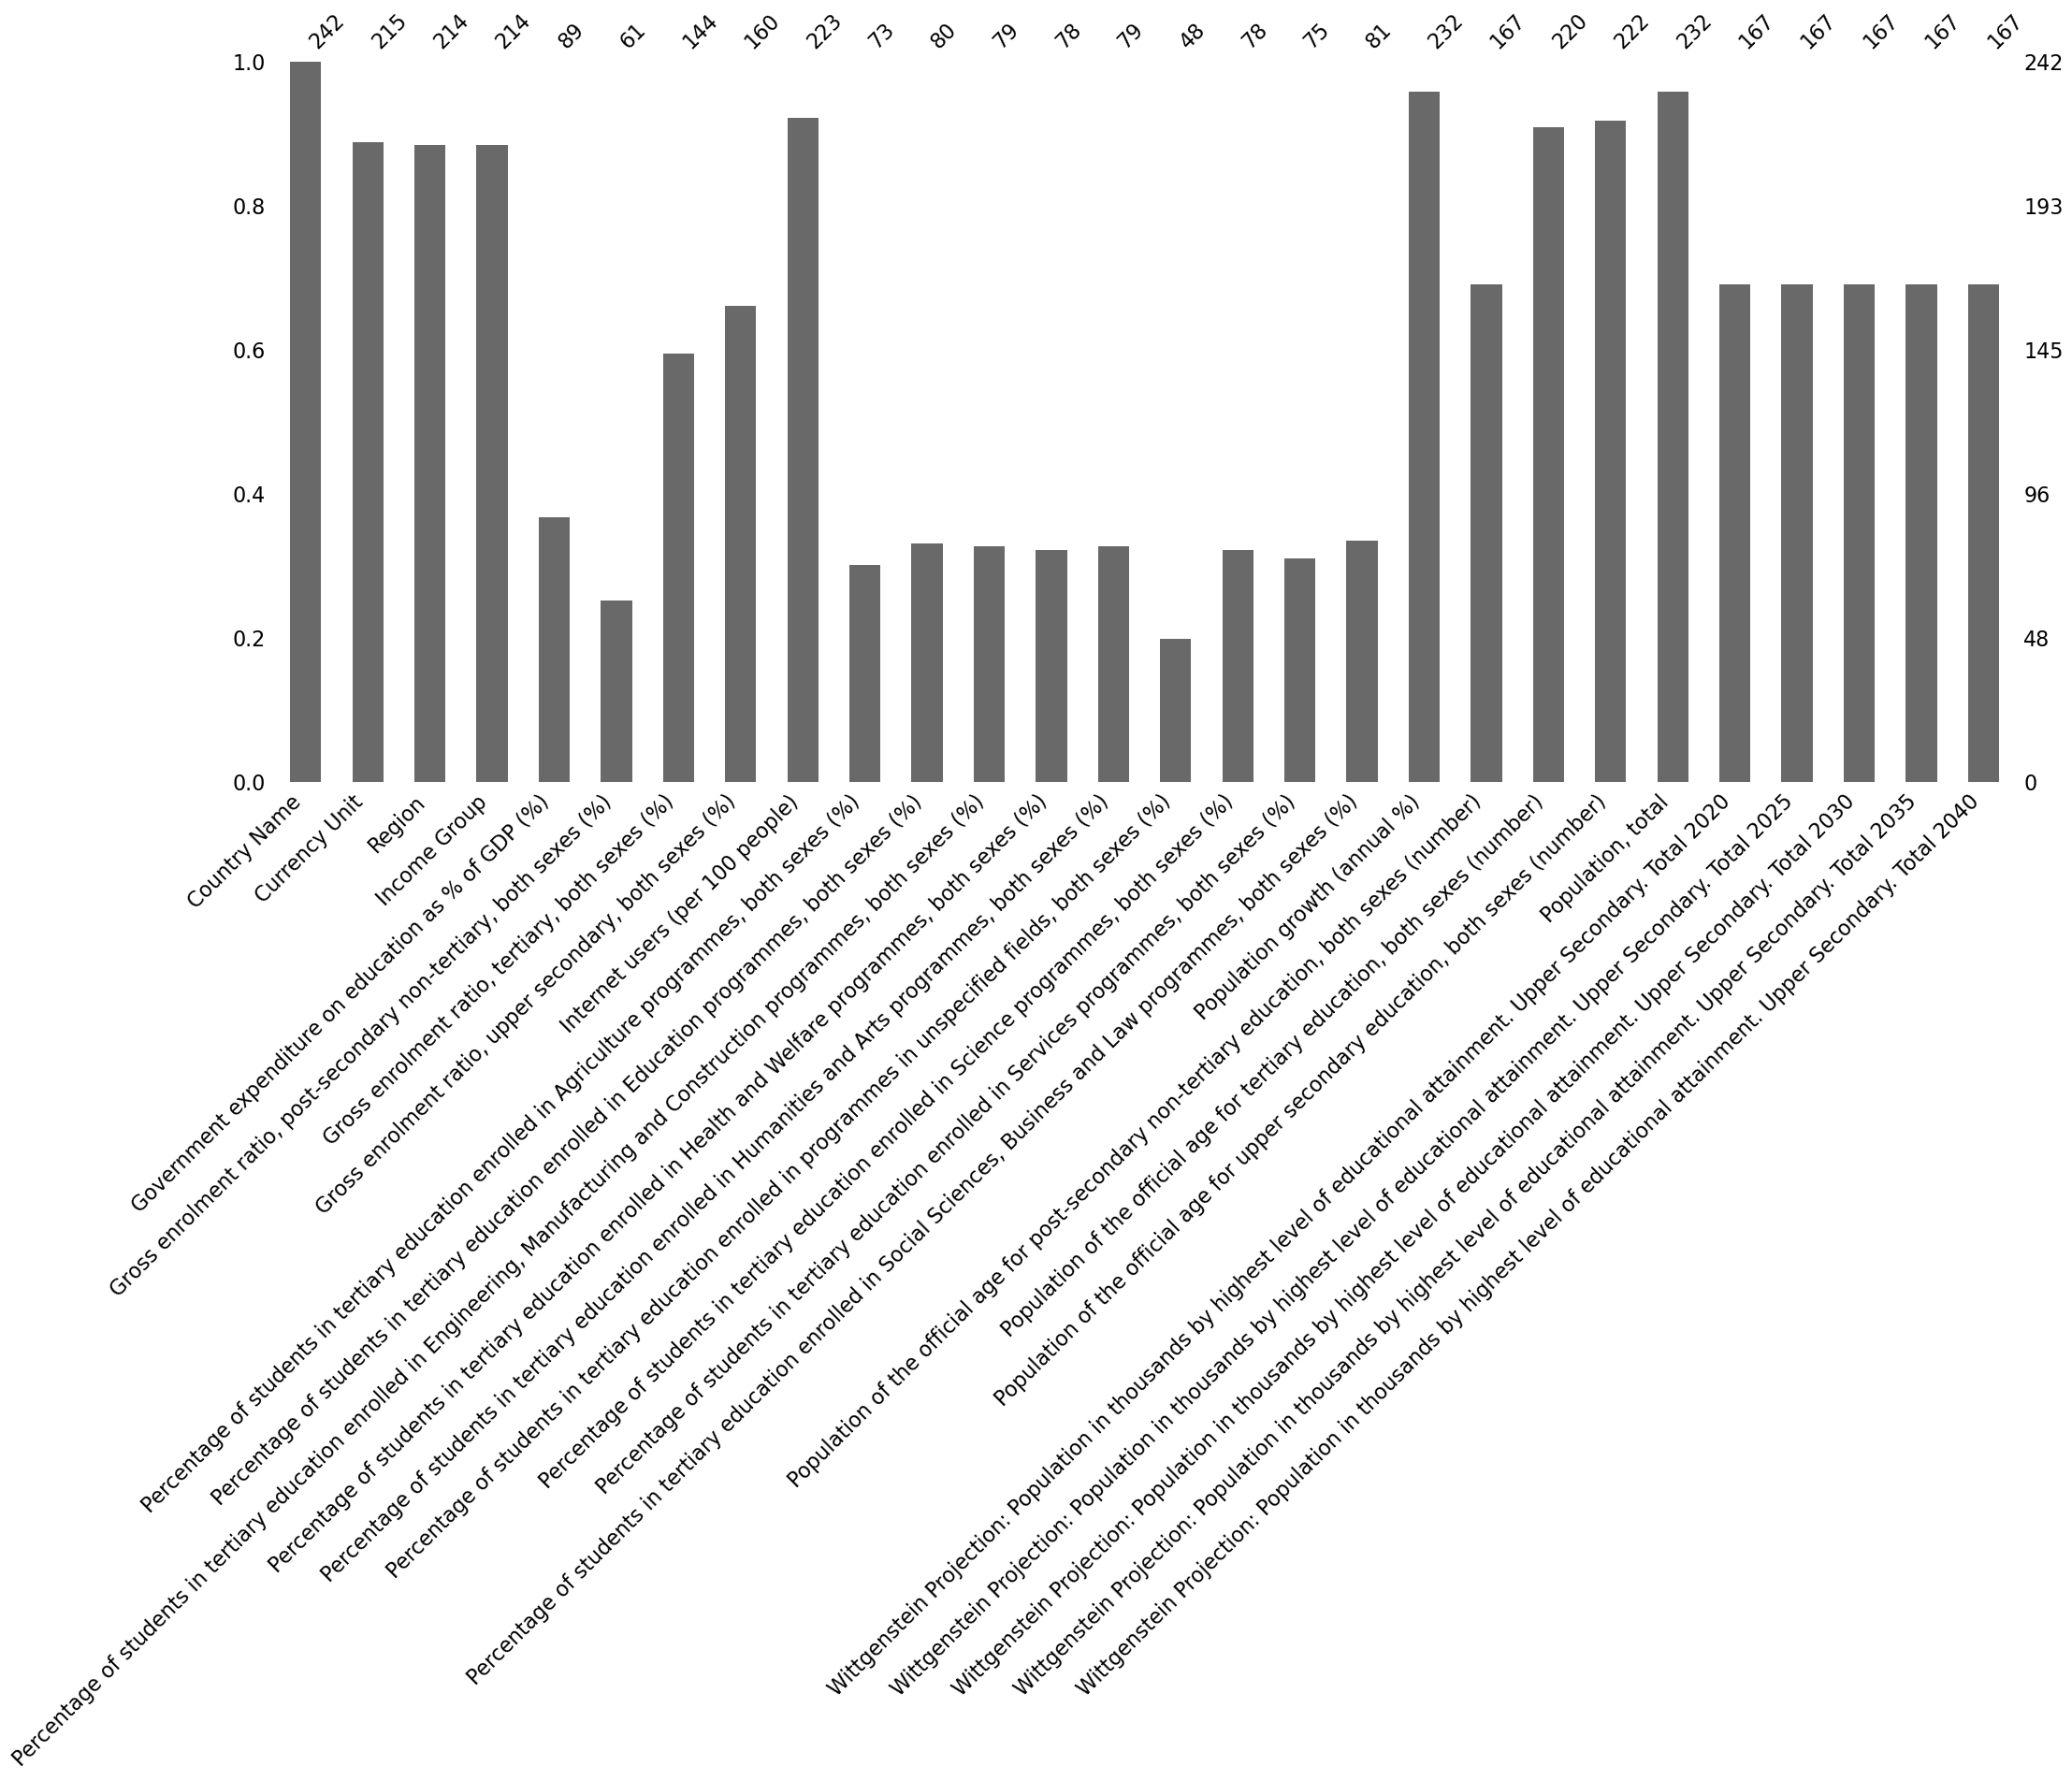

In [55]:
# Graphique pour représenter les NA dans un dataset avec missingno
# msno.matrix(tab_init)
# msno.heatmap(tab_init)
msno.bar(tab_init)

In [56]:
# Scinder la table en 2 : 1 base avec les aggrégats de régions - 1 base avec les pays
base_etudeAGG_EdStatsData = tab_init[pd.isna(tab_init['Region'])]
base_etudePAYS_EdStatsData = tab_init[pd.notna(tab_init['Region'])]
# Conserver la ligne "World" dans le df PAYS :
world=base_etudeAGG_EdStatsData.loc[base_etudeAGG_EdStatsData['Country Name']=='World', :]
base_etudePAYS_EdStatsData = pd.merge(base_etudePAYS_EdStatsData, world, how='outer')

In [57]:
base_etudeAGG_EdStatsData.shape
# Il y a 28 aggrégats de pays

(28, 28)

In [58]:
base_etudePAYS_EdStatsData.shape
# Il y a 214 pays + ligne WORLD

(215, 28)

In [59]:
# On indexe la table par le nom des pays
base_etudePAYS_EdStatsData.set_index('Country Name', inplace=True)

In [60]:
# Utiliser cette variable pour filtrer sur les pays à étudier : 
# Population of the official age for upper secondary education, both sexes (number)

In [61]:
# Utiliser la méthode describe() pour obtenir un récapitulatif des indicateurs statistiques
liste_aretirer = ['World']
mask = ~base_etudePAYS_EdStatsData.index.isin(liste_aretirer)
df_filtered = base_etudePAYS_EdStatsData[mask]
resume_stat_NB_uppersec = df_filtered['Population of the official age for upper secondary education, both sexes (number)'].describe()
# 195 valeurs sont renseignées, avec un nombre d'étudiants de 1 954 386 en moyenne, un minimum de 634 étudiants, 50% des pays ont plus de 348 973 étudiants
# Afficher le récapitulatif statistique
print(resume_stat_NB_uppersec)

count    1.950000e+02
mean     1.954386e+06
std      8.119041e+06
min      6.340000e+02
25%      7.669600e+04
50%      3.489730e+05
75%      1.290139e+06
max      9.861326e+07
Name: Population of the official age for upper secondary education, both sexes (number), dtype: float64


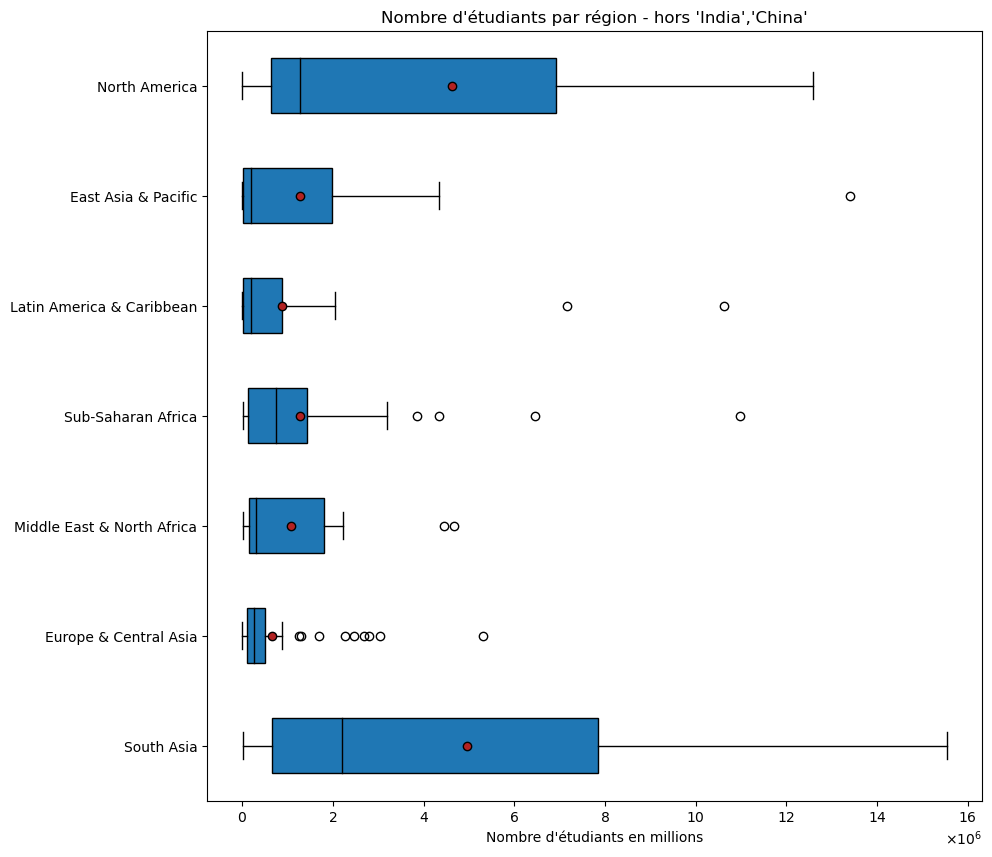

In [62]:
# Box plot par région avec le nb d'étudiants :
y = 'Region' # qualitative
x = 'Population of the official age for upper secondary education, both sexes (number)' # quantitative

# Retirer les gros pays pour une meilleure lisibilité du graphique
liste_aretirer = ['World','India','China']
mask = ~base_etudePAYS_EdStatsData.index.isin(liste_aretirer)
df_filtered = base_etudePAYS_EdStatsData[mask]

# Supprimer les valeurs manquantes
df_filtered = df_filtered.dropna(subset=[x])

modalites = df_filtered[y].unique()
groupes = []
for m in modalites:
    groupes.append(df_filtered[df_filtered[y]==m][x])

# Propriétés graphiques 
plt.figure(figsize=(10, 10))
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.title("Nombre d'étudiants par région - hors 'India','China'")
plt.xlabel("Nombre d'étudiants en millions")
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
# Obtenir l'axe y actuel
ax = plt.gca()

# Utiliser ScalarFormatter pour formater les chiffres en notation scientifique
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(6,6))  # Pour forcer la notation scientifique, et afficher en format 10^6

plt.show()

In [63]:
pays_amerique = base_etudePAYS_EdStatsData.loc[base_etudePAYS_EdStatsData['Region'] == 'North America', :]
pays_amerique.head()

,Currency Unit,Region,Income Group,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
Country Name,,,,,,,,,,,,,,,,,,,,,
Bermuda,Bermuda dollar,North America,High income: nonOECD,1.78285,NaN,27.459730,68.310959,98.000000,NaN,NaN,...,0.147160,NaN,4035.0,3203.0,65331.0,NaN,NaN,NaN,NaN,NaN
Canada,Canadian dollar,North America,High income: OECD,NaN,NaN,NaN,NaN,89.840000,NaN,NaN,...,1.213891,928462.0,2389616.0,1266224.0,36286425.0,10926.34,11270.35,11535.64,11763.91,11932.90
United States,U.S. dollar,North America,High income: OECD,5.38078,25.937309,86.663963,93.286598,76.176737,0.64438,7.59399,...,0.692801,4424384.0,22731736.0,12580923.0,323127513.0,136327.64,141029.95,144645.12,146923.68,149456.86


In [64]:
df_filtered.head()

,Currency Unit,Region,Income Group,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghan afghani,South Asia,Low income,3.78028,11.15165,8.662800,43.905590,10.595726,6.42589,14.75155,...,2.689163,1302229.0,3034517.0,2206482.0,34656032.0,NaN,NaN,NaN,NaN,NaN
Albania,Albanian lek,Europe & Central Asia,Upper middle income,NaN,1.74154,62.706848,93.927422,66.363445,5.20024,8.87475,...,-0.159880,112085.0,277193.0,161760.0,2876101.0,1175.09,1302.61,1411.12,1502.85,1581.72
Algeria,Algerian dinar,Middle East & North Africa,Upper middle income,NaN,NaN,34.593811,NaN,42.945527,1.54688,2.16013,...,1.825463,NaN,3600292.0,1862417.0,40606052.0,9792.13,11476.49,13185.97,14873.06,16396.71
Angola,Angolan kwanza,Sub-Saharan Africa,Upper middle income,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,...,3.367572,NaN,2286479.0,1612084.0,28813463.0,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,East Caribbean dollar,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,82.103607,73.000000,NaN,NaN,...,1.035422,3183.0,7878.0,3185.0,100963.0,NaN,NaN,NaN,NaN,NaN


In [65]:
# On se base sur l'indicateur : 'Population of the official age for upper secondary education, both sexes (number)' pour retirer les pays avec trop peu de volume d'étudiants
base_etudePAYS_triee = base_etudePAYS_EdStatsData.sort_values(by='Population of the official age for upper secondary education, both sexes (number)')
base_etudePAYSrestreints_EdStatsData=base_etudePAYS_triee.loc[base_etudePAYS_triee['Population of the official age for upper secondary education, both sexes (number)']>=200000, ]
# Avec 10 000 on passe à 177 pays
# Avec 100 000 on passe à 142 pays
# Avec 200 000 on passe à 119 pays

In [66]:
base_etudePAYSrestreints_EdStatsData.shape
# 119 pays + World

(120, 27)

In [67]:
top_5_max_values = base_etudePAYSrestreints_EdStatsData['Population of the official age for upper secondary education, both sexes (number)'].nlargest(5)
print(top_5_max_values)

Country Name
World        381429696.0
India         98613256.0
China         49212488.0
Pakistan      15539628.0
Indonesia     13400031.0
Name: Population of the official age for upper secondary education, both sexes (number), dtype: float64


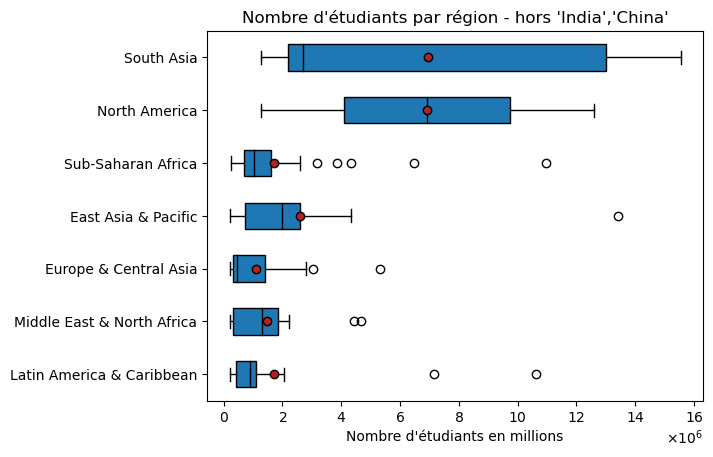

In [68]:
# Box plot par région avec le nb d'étudiants :
y = 'Region' # qualitative
x = 'Population of the official age for upper secondary education, both sexes (number)' # quantitative

# Retirer les gros pays pour une meilleure lisibilité du graphique
liste_aretirer = ['World','India','China']
mask = ~base_etudePAYSrestreints_EdStatsData.index.isin(liste_aretirer)
df_filtered = base_etudePAYSrestreints_EdStatsData[mask]

modalites = df_filtered[y].unique()
groupes = []
for m in modalites:
    groupes.append(df_filtered[df_filtered[y]==m][x])

# Propriétés graphiques 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.title("Nombre d'étudiants par région - hors 'India','China'")
plt.xlabel("Nombre d'étudiants en millions")
    
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

# Obtenir l'axe x actuel
ax = plt.gca()

# Utiliser ScalarFormatter pour formater les chiffres en notation scientifique
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(6,6))  # Pour forcer la notation scientifique, et afficher en format 10^6
plt.show()

In [69]:
base_etudePAYSrestreints_EdStatsData.head()

,Currency Unit,Region,Income Group,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
Country Name,,,,,,,,,,,,,,,,,,,,,
Panama,Panamanian balboa,Latin America & Caribbean,Upper middle income,NaN,NaN,NaN,57.455971,54.000000,NaN,NaN,...,1.621103,133280.0,325432.0,206955.0,4034119.0,899.00,1024.48,1143.21,1252.86,1357.89
West Bank and Gaza,Israeli new shekel,Middle East & North Africa,Lower middle income,NaN,0.57623,44.006870,67.763283,61.178385,0.78155,28.801741,...,2.884693,102390.0,486140.0,209646.0,4551566.0,817.39,1011.85,1223.91,1434.84,1632.52
Kyrgyz Republic,Kyrgyz som,Europe & Central Asia,Lower middle income,5.52738,NaN,45.917831,82.095139,34.500000,NaN,NaN,...,2.089846,112237.0,583477.0,217131.0,6082700.0,3092.25,3339.26,3604.49,3828.30,3989.40
Denmark,Danish krone,Europe & Central Asia,High income: OECD,NaN,NaN,81.516472,142.486664,96.967785,1.39251,9.788350,...,0.834638,75285.0,369740.0,218518.0,5731118.0,2257.33,2359.06,2449.15,2504.52,2571.93
"Hong Kong SAR, China",Hong Kong dollar,East Asia & Pacific,High income: nonOECD,3.56972,15.24807,68.778732,99.674141,87.300343,0.06330,5.918920,...,0.559637,162296.0,443285.0,226174.0,7346700.0,2367.36,2451.42,2613.39,2759.75,2830.07


<b> Analyse des valeurs manquantes des pays au global et en fonction des régions </b> 

In [70]:
base_etudePAYSrestreints_EdStatsData.describe()
# Il y a encore quelques pays avec des valeurs manquantes sur les variables

,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
count,58.000000,37.000000,81.000000,82.000000,118.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,118.000000,8.100000e+01,1.190000e+02,1.200000e+02,1.180000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02
mean,4.570316,13.443050,43.189556,78.074285,44.850718,2.024838,11.503250,14.317421,10.921150,11.478514,...,1.509909,3.649566e+06,1.003080e+07,6.313940e+06,1.246188e+08,2.893739e+04,3.223360e+04,3.557573e+04,3.889132e+04,4.210830e+04
std,1.478499,17.513173,27.761511,37.236249,28.434053,1.285043,8.086458,6.662298,5.433911,6.974649,...,1.093459,1.734744e+07,5.671276e+07,3.600154e+07,7.023228e+08,1.569365e+05,1.749306e+05,1.932037e+05,2.113779e+05,2.290389e+05
min,1.712970,0.158790,2.565380,10.214850,1.177119,0.063300,0.234180,0.278230,2.116320,1.828510,...,-1.638839,7.528500e+04,3.254320e+05,2.069550e+05,4.034119e+06,1.192500e+02,1.844100e+02,2.798200e+02,3.778100e+02,4.977300e+02
25%,3.501785,0.938820,17.291941,45.349233,20.321620,1.118160,5.668450,8.982185,7.117755,7.837920,...,0.845175,2.677610e+05,6.912930e+05,4.180365e+05,9.839249e+06,1.062820e+03,1.447910e+03,1.876287e+03,2.387215e+03,2.723617e+03
50%,4.694395,6.661380,42.772831,82.652050,44.203634,1.831040,9.325110,14.251420,9.530210,9.799010,...,1.378828,6.268220e+05,1.609542e+06,1.043648e+06,1.917587e+07,3.677045e+03,4.156435e+03,4.609925e+03,4.985290e+03,5.408050e+03
75%,5.366958,15.248070,65.473801,100.225294,69.885052,2.849070,14.142525,18.304210,14.373860,13.402915,...,2.497922,1.302229e+06,3.561264e+06,2.182289e+06,4.795716e+07,1.106745e+04,1.253134e+04,1.415131e+04,1.562853e+04,1.704884e+04
max,8.429330,77.699471,113.871788,186.427887,96.967785,6.425890,34.310902,36.922932,24.621811,39.172371,...,3.826066,1.492562e+08,6.023727e+08,3.814297e+08,7.442136e+09,1.599479e+06,1.781898e+06,1.967258e+06,2.151416e+06,2.330336e+06


In [71]:
# Calculer le nombre de valeurs manquantes par région pour toutes les variables
# Liste des variables à inclure dans le calcul
variables = base_etudePAYSrestreints_EdStatsData.columns 

# Initialiser un dictionnaire pour stocker les taux de valeurs manquantes par région pour chaque variable
valeurs_manquantes_par_variable_par_region = {}

# Boucle sur toutes les variables
for variable in variables:
    # Calculer le taux de valeurs manquantes par région pour la variable actuelle
    valeurs_manquantes_par_region = base_etudePAYSrestreints_EdStatsData.groupby('Region')[variable].apply(lambda x: x.isnull().mean() * 100)
    # Stocker les résultats dans le dictionnaire
    valeurs_manquantes_par_variable_par_region[variable] = valeurs_manquantes_par_region

# Convertir le dictionnaire en DataFrame pour une meilleure lisibilité
df_valeurs_manquantes = pd.DataFrame(valeurs_manquantes_par_variable_par_region)

# Afficher le DataFrame contenant les taux de valeurs manquantes par région pour chaque variable
df_valeurs_manquantes.head()

,Currency Unit,Region,Income Group,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,0.0,0.0,0.0,53.333333,66.666667,26.666667,33.333333,6.666667,53.333333,53.333333,...,0.0,26.666667,0.000000,0.0,0.0,13.333333,13.333333,13.333333,13.333333,13.333333
Europe & Central Asia,0.0,0.0,0.0,35.714286,39.285714,3.571429,7.142857,0.000000,28.571429,28.571429,...,0.0,17.857143,0.000000,0.0,0.0,3.571429,3.571429,3.571429,3.571429,3.571429
Latin America & Caribbean,0.0,0.0,0.0,50.000000,88.888889,50.000000,16.666667,0.000000,66.666667,66.666667,...,0.0,61.111111,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Middle East & North Africa,0.0,0.0,0.0,86.666667,66.666667,33.333333,46.666667,0.000000,40.000000,40.000000,...,0.0,40.000000,6.666667,0.0,0.0,13.333333,13.333333,13.333333,13.333333,13.333333
North America,0.0,0.0,0.0,50.000000,50.000000,50.000000,50.000000,0.000000,50.000000,50.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [72]:
# On transpose la base pour calculer facilement la moyenne des valeurs manquantes par pays
df_transpose = df_valeurs_manquantes.transpose()
df_transpose.mean()

Region
East Asia & Pacific           28.641975
Europe & Central Asia         14.682540
Latin America & Caribbean     32.716049
Middle East & North Africa    26.913580
North America                 24.074074
South Asia                    26.543210
Sub-Saharan Africa            42.962963
dtype: float64

In [73]:
# On supprime les régions pour lesquelles il y a plus de 30% de valeurs manquantes en moyenne.
regionsAsupp=['Latin America & Caribbean','Sub-Saharan Africa']
base_etudePAYSrestreints_EdStatsData = base_etudePAYSrestreints_EdStatsData[~base_etudePAYSrestreints_EdStatsData['Region'].isin(regionsAsupp)]

In [74]:
# On supprime la région North America car contient uniquement les US (origine de la société) et le Canada
regionsAsupp=['North America']
base_etudePAYSrestreints_EdStatsData = base_etudePAYSrestreints_EdStatsData[~base_etudePAYSrestreints_EdStatsData['Region'].isin(regionsAsupp)]

In [75]:
base_etudePAYSrestreints_EdStatsData.shape

(65, 27)

In [76]:
print(base_etudePAYSrestreints_EdStatsData.index)

Index(['West Bank and Gaza', 'Kyrgyz Republic', 'Denmark',
       'Hong Kong SAR, China', 'Slovak Republic', 'United Arab Emirates',
       'Bulgaria', 'Azerbaijan', 'Jordan', 'Serbia', 'Lebanon', 'Libya',
       'Greece', 'Portugal', 'Sweden', 'Tajikistan', 'Austria', 'Switzerland',
       'Israel', 'Czech Republic', 'Hungary', 'Lao PDR', 'Kazakhstan',
       'Belgium', 'Australia', 'Netherlands', 'Papua New Guinea', 'Tunisia',
       'Romania', 'Ukraine', 'Cambodia', 'Korea, Dem. People’s Rep.', 'Spain',
       'Sri Lanka', 'Poland', 'Syrian Arab Republic', 'Saudi Arabia',
       'Uzbekistan', 'Yemen, Rep.', 'Morocco', 'Algeria', 'Korea, Rep.',
       'Myanmar', 'Philippines', 'Afghanistan', 'Iraq', 'France', 'Malaysia',
       'Germany', 'Russian Federation', 'Nepal', 'Thailand', 'Italy',
       'United Kingdom', 'Japan', 'Vietnam', 'Iran, Islamic Rep.',
       'Egypt, Arab Rep.', 'Turkey', 'Bangladesh', 'Indonesia', 'Pakistan',
       'China', 'India', 'World'],
      dtype='object

#### Etude préliminaire de quelques indicateurs sur ces 64 pays restreints.

In [77]:
# Sur les 64 pays restreints, filtrer le DataFrame pour exclure la ligne correspondant à "world" (pour les indicateurs en nombre)
liste_aretirer = ['World']
mask = ~base_etudePAYSrestreints_EdStatsData.index.isin(liste_aretirer)
df_filtered = base_etudePAYSrestreints_EdStatsData[mask]

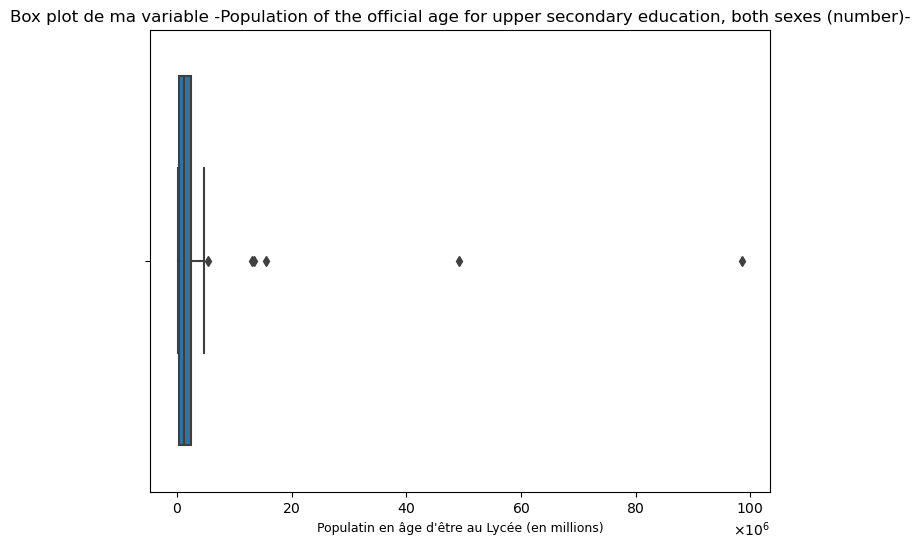

In [78]:
# Créer un nouveau graphique et un nouvel axe
fig, ax = plt.subplots(figsize=(8, 6))
# Représentation de la dispersion du nb d'étudiants au Lycée
sns.boxplot(x='Population of the official age for upper secondary education, both sexes (number)', data=df_filtered)
# Ajouter un titre
plt.title('Box plot de ma variable -Population of the official age for upper secondary education, both sexes (number)-')
plt.xlabel("Populatin en âge d'être au Lycée (en millions)",fontsize=9)
# Utiliser ScalarFormatter pour formater les chiffres en notation scientifique
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(6,6))  # Pour forcer la notation scientifique, et afficher en format 10^6
# Afficher le plot
plt.show()

In [79]:
# La représentation en boxplot est sensible aux valeurs extrêmes et dans ce cas écrase le graphique
top_5_max_values = df_filtered['Population of the official age for upper secondary education, both sexes (number)'].nlargest(5)
print(top_5_max_values)

Country Name
India         98613256.0
China         49212488.0
Pakistan      15539628.0
Indonesia     13400031.0
Bangladesh    12997460.0
Name: Population of the official age for upper secondary education, both sexes (number), dtype: float64


In [80]:
# Retirer les pays les plus grands pour une meilleure visualisation
liste_grands_pays = ['World','India','China','Pakistan']
mask1 = ~base_etudePAYSrestreints_EdStatsData.index.isin(liste_grands_pays)
df_sansGrandsPays = base_etudePAYSrestreints_EdStatsData[mask1]

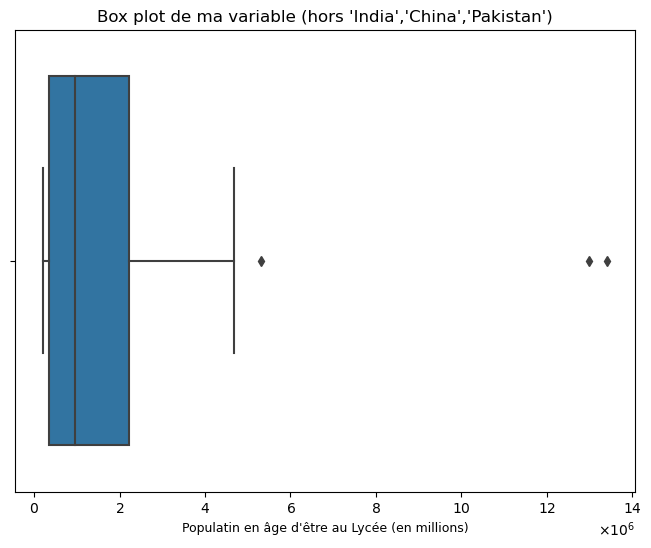

In [81]:
# Créer un nouveau graphique et un nouvel axe
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Population of the official age for upper secondary education, both sexes (number)', data=df_sansGrandsPays)
# Ajouter un titre
plt.title("Box plot de ma variable (hors 'India','China','Pakistan')")
plt.xlabel("Populatin en âge d'être au Lycée (en millions)",fontsize=9)
# Utiliser ScalarFormatter pour formater les chiffres en notation scientifique
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(6,6))  # Pour forcer la notation scientifique, et afficher en format 10^6
# Afficher le plot
plt.show()

In [82]:
base_etudePAYSrestreints_EdStatsData.describe()
# Il y a encore plusieurs valeurs manquantes sur les indicateurs principaux
# Restreindre encore la liste des pays

,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
count,31.000000,29.000000,55.000000,49.000000,64.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,65.000000,4.900000e+01,6.400000e+01,6.500000e+01,6.500000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01
mean,4.407674,15.411621,51.296803,95.524951,58.397968,2.069596,11.158376,14.328092,10.629032,12.253624,...,1.018400,5.334539e+06,1.605050e+07,1.004587e+07,1.958426e+08,4.746850e+04,5.274497e+04,5.805396e+04,6.326116e+04,6.821056e+04
std,1.359292,18.848681,24.701421,31.677022,26.037797,1.377526,8.021380,6.738959,5.271440,7.019570,...,0.996198,2.220427e+07,7.699640e+07,4.871377e+07,9.421300e+08,2.123960e+05,2.368729e+05,2.617382e+05,2.864790e+05,3.105238e+05
min,1.901970,0.279660,8.574050,31.055099,9.601538,0.063300,0.234180,0.278230,2.116320,1.828510,...,-1.638839,7.528500e+04,3.697400e+05,2.096460e+05,4.551566e+06,8.057300e+02,9.001300e+02,9.880500e+02,1.070220e+03,1.144470e+03
25%,3.444915,3.525930,31.390545,73.900284,33.887751,1.104373,5.397590,9.187610,7.127773,8.664143,...,0.407491,1.636090e+05,6.658095e+05,3.663760e+05,9.455802e+06,3.237985e+03,3.526955e+03,3.655207e+03,3.827003e+03,4.019293e+03
50%,4.270930,8.594490,53.192810,98.015297,60.501966,1.687345,9.506635,14.274290,8.767785,10.444985,...,1.132886,5.711920e+05,2.119998e+06,1.244273e+06,2.536862e+07,6.709820e+03,7.357845e+03,8.108255e+03,9.058660e+03,9.979765e+03
75%,5.362445,24.730989,66.099148,111.409348,79.953068,2.959662,13.907293,18.220680,13.641817,13.364768,...,1.564833,1.372954e+06,4.236620e+06,2.466622e+06,6.563724e+07,1.826337e+04,2.057935e+04,2.272751e+04,2.367181e+04,2.329284e+04
max,7.675090,77.699471,113.871788,186.427887,96.967785,6.425890,34.310902,36.922932,24.621811,39.172371,...,3.185855,1.492562e+08,6.023727e+08,3.814297e+08,7.442136e+09,1.599479e+06,1.781898e+06,1.967258e+06,2.151416e+06,2.330336e+06


In [83]:
# Retirer les pays pour lesquels les valeurs des indicateurs (colonnes a tester) sont manquantes :
# colonnes_a_tester = ['Government expenditure on education as % of GDP (%)',
#      'Gross enrolment ratio, upper secondary, both sexes (%)',
#      'Internet users (per 100 people)',
#      'Population growth (annual %)',              
#      'Population of the official age for upper secondary education, both sexes (number)',
#      'Population, total',
#      'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020',
#      'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025',
#      'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030',
#      'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035',
#      'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040']
# Supprimer les lignes avec au moins une valeur manquante dans n'importe quelle colonne
# base_45PAYS_EdStatsData = base_etudePAYSrestreints_EdStatsData[colonnes_a_tester].dropna(how='any')
# base_45PAYS_EdStatsData.shape
## Trop restritif, cela enlève trop de pays importants (ex : France), privilégier plutôt un autre indicateur pour *
## restreindre encore les pays et corriger les valeurs manquantes sur les pays restants

In [84]:
# Se baser sur la variable usage d'Internet pour restreindre la liste des pays étudiés
base_etudePAYSrestreints_EdStatsData['Internet users (per 100 people)'].describe()

count    64.000000
mean     58.397968
std      26.037797
min       9.601538
25%      33.887751
50%      60.501966
75%      79.953068
max      96.967785
Name: Internet users (per 100 people), dtype: float64

In [85]:
top_20_min_values = base_etudePAYSrestreints_EdStatsData['Internet users (per 100 people)'].nsmallest(20)
print(top_20_min_values)
# Supprimer les pays < 50 usagers internet pour 100 personnes ou 35% (qui correspond au quartile 25%) 
# ou 61% qui correspond à la médiane 50% ?

Country Name
Papua New Guinea         9.601538
Afghanistan             10.595726
Pakistan                15.514558
Bangladesh              18.246938
Nepal                   19.688764
Libya                   20.272160
Tajikistan              20.470000
Iraq                    21.230000
Lao PDR                 21.870000
Yemen, Rep.             24.579208
Myanmar                 25.073304
Indonesia               25.366301
Cambodia                25.570687
India                   29.547163
Syrian Arab Republic    31.869627
Sri Lanka               32.051003
Kyrgyz Republic         34.500000
Egypt, Arab Rep.        39.213813
Algeria                 42.945527
World                   45.910282
Name: Internet users (per 100 people), dtype: float64


In [86]:
# On supprime tous les pays pour lesquels le nombre d'usagers Internet est inférieur à 61 pour 100 personnes (50% des pays). 
base_triee = base_etudePAYSrestreints_EdStatsData.sort_values(by='Internet users (per 100 people)')
base_32PAYS_EdStatsData=base_triee.loc[base_triee['Internet users (per 100 people)']>=61, ]

In [87]:
base_32PAYS_EdStatsData.shape

(32, 27)

In [88]:
print(base_32PAYS_EdStatsData.index)

Index(['West Bank and Gaza', 'Italy', 'Jordan', 'Serbia', 'Greece', 'Portugal',
       'Poland', 'Saudi Arabia', 'Lebanon', 'Russian Federation',
       'Czech Republic', 'Kazakhstan', 'Azerbaijan', 'Malaysia', 'Hungary',
       'Israel', 'Slovak Republic', 'Spain', 'Austria', 'France', 'Belgium',
       'Hong Kong SAR, China', 'Australia', 'Switzerland', 'Germany',
       'Netherlands', 'United Arab Emirates', 'Sweden', 'Japan', 'Korea, Rep.',
       'United Kingdom', 'Denmark'],
      dtype='object', name='Country Name')


Text(0.5, 1.0, 'Nombre de pays étudiés par région')

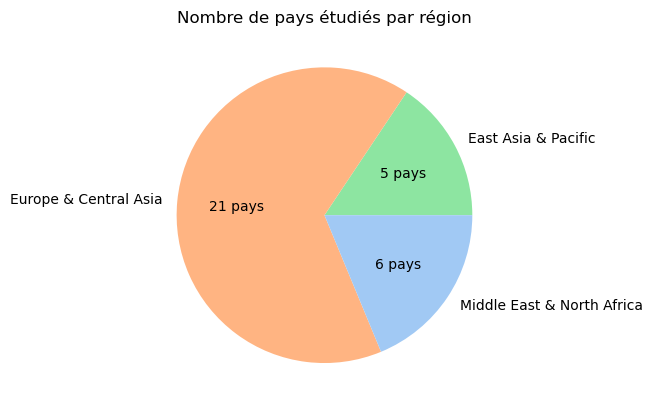

In [89]:
# Représentation du nb de pays par région
data = base_32PAYS_EdStatsData.groupby('Region').count()
df = data.reset_index()

# Créer le diagramme circulaire avec une fonction personnalisée pour afficher le nb de pays pour autopct
def autopct_format(nombre):
    return f'{(32*nombre)/100:.0f} pays'

palette = sns.color_palette("pastel")
# Affectation de couleurs en particulier pour la cohérence avec les graphiques suivants
colors = [palette[2],palette[1],palette[0]]

# Créer le diagramme circulaire
plt.pie(x=df['Income Group'], labels=df['Region'], autopct=autopct_format,colors=colors)
# Les chiffres affichés ne sont pas bons

# Ajouter un titre
plt.title('Nombre de pays étudiés par région')

In [90]:
# Afficher la liste des pays par région :
for region in base_32PAYS_EdStatsData['Region'].unique():
    print(region)
    print(base_32PAYS_EdStatsData.loc[base_32PAYS_EdStatsData['Region'] == region].index)

Middle East & North Africa
Index(['West Bank and Gaza', 'Jordan', 'Saudi Arabia', 'Lebanon', 'Israel',
       'United Arab Emirates'],
      dtype='object', name='Country Name')
Europe & Central Asia
Index(['Italy', 'Serbia', 'Greece', 'Portugal', 'Poland', 'Russian Federation',
       'Czech Republic', 'Kazakhstan', 'Azerbaijan', 'Hungary',
       'Slovak Republic', 'Spain', 'Austria', 'France', 'Belgium',
       'Switzerland', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom',
       'Denmark'],
      dtype='object', name='Country Name')
East Asia & Pacific
Index(['Malaysia', 'Hong Kong SAR, China', 'Australia', 'Japan',
       'Korea, Rep.'],
      dtype='object', name='Country Name')


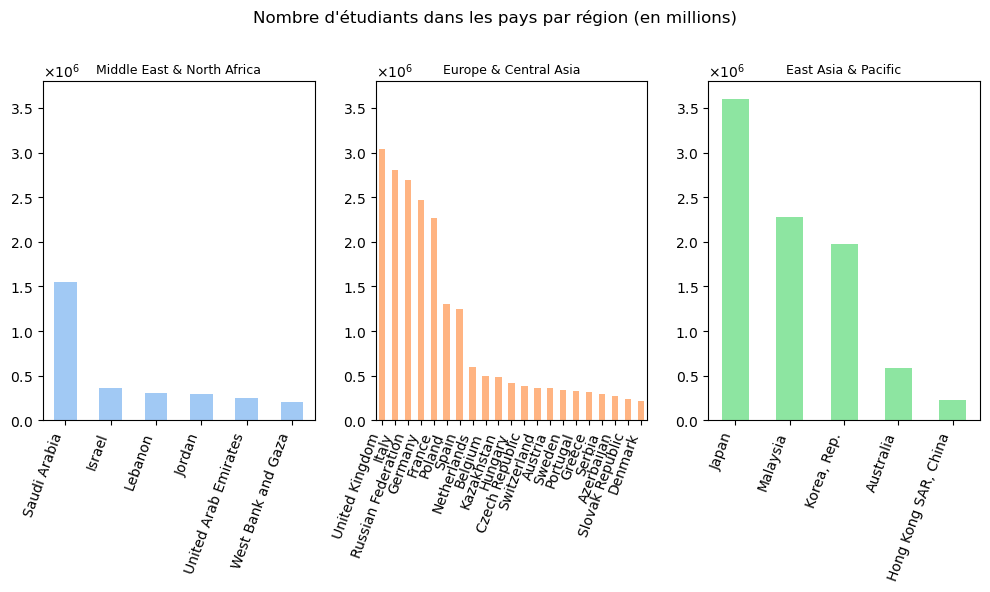

In [91]:
plt.close()

# Afficher le nb d'étudiants par pays pour chaque région

# Définir la palette de couleurs
palette = sns.color_palette("pastel")  # Choisissez la palette de couleurs souhaitée

# Boucler sur chaque région et tracer un sous-graphique
regions = base_32PAYS_EdStatsData['Region'].unique()
variable = 'Population of the official age for upper secondary education, both sexes (number)' 
num_regions = len(regions)

fig, axes = plt.subplots(1, num_regions, figsize=(10, 6))  # Créer une figure et des axes pour les sous-graphiques

for i, region in enumerate(regions, 0):  # Utiliser enumerate pour obtenir à la fois l'indice et la valeur de la région
    data = base_32PAYS_EdStatsData[base_32PAYS_EdStatsData['Region'] == region]
    data_sorted = data.sort_values(variable, ascending=False)
    data_sorted.plot(kind='bar', y=variable, ax=axes[i], legend=None, color=palette[i])  # Utiliser plt.gca() pour obtenir l'axe actuel
    axes[i].set_title(region, fontsize=9)  # Titre de chaque sous-graphique
    axes[i].set_ylim(0, 3800000)
    axes[i].set_xlabel(None)
    # Rotation des étiquettes et alignement à droite des étiquettes (et nom centré)
    axes[i].set_xticklabels(data_sorted.index, rotation=70, horizontalalignment='right')  
    # Utiliser ScalarFormatter pour formater les chiffres en notation scientifique
    axes[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[i].ticklabel_format(axis='y', style='sci', scilimits=(6, 6))  # Pour forcer la notation scientifique, et afficher en format 10^6

# Donner un titre à la fenêtre graphique
plt.suptitle("Nombre d'étudiants dans les pays par région (en millions)")

# Afficher les sous-graphiques
plt.tight_layout()
plt.show()

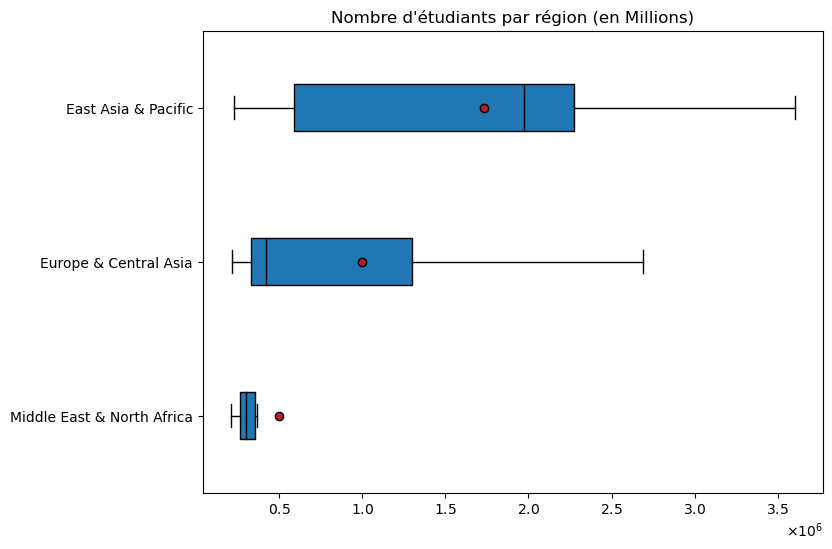

In [92]:
# Box plot par région avec le nb d'étudiants :
x = 'Region' # qualitative
y = 'Population of the official age for upper secondary education, both sexes (number)' # quantitative

# Créer un nouveau graphique et un nouvel axe
fig, ax = plt.subplots(figsize=(8, 6))

modalites = base_32PAYS_EdStatsData[x].unique()
groupes = []
for m in modalites:
    groupes.append(base_32PAYS_EdStatsData[base_32PAYS_EdStatsData[x]==m][y])

# Propriétés graphiques 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.title("Nombre d'étudiants par région (en Millions)")

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

# Utiliser ScalarFormatter pour formater les chiffres en notation scientifique
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(6,6))  # Pour forcer la notation scientifique, et afficher en format 10^6

plt.show()

<div class="alert alert-block alert-info">
    
<b> Bilan : étude détaillée des indicateurs restreints sur ces 32 pays selectionnes.</b>
</div>

## 3. Etape 3 : analyse des données

### Etude des indicateurs en 3 étapes : sur la base des 32 pays selectionnes

<b> Prio 1 : études des indicateurs suivants (valeurs abérantes, manquantes, dispersion) </b> 

- Gross enrolment ratio, upper secondary, both sexes (%)
- Internet users (per 100 people)
- Government expenditure on education as % of GDP (%)

<b> Prio 2 : croisement de ces indicateurs entre eux pour mettre en avant des pays à fort potentiel </b> 

<b> Prio 3 : mise en relation avec le potentiel du pays actuel et futur </b> 

- Population growth (annual %)
- Population, total 
- Population of the official age for upper secondary education, both sexes (number)
- Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total

<b> Prio 4 : pour les pays identifiés, aller plus loin en analysant les matières à plus fort potentiel </b> 

- Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)
- Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)


<b> Prio 1 : études des indicateurs (valeurs abérantes, manquantes, dispersion) </b> 

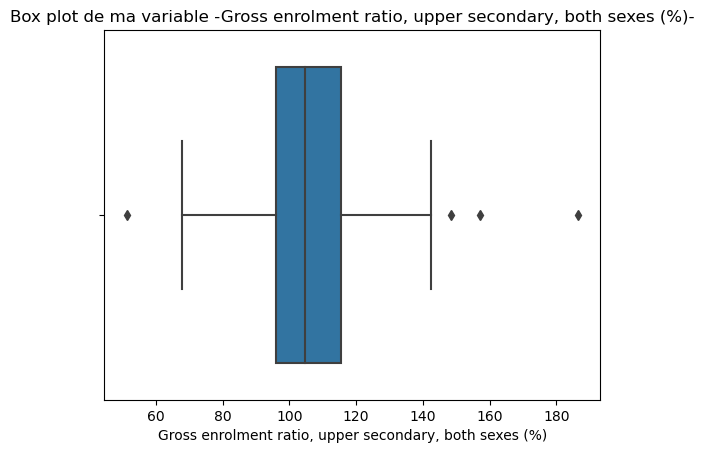

In [93]:
# Variable : 'Gross enrolment ratio, upper secondary, both sexes (%)'
variable = 'Gross enrolment ratio, upper secondary, both sexes (%)'
sns.boxplot(x=variable, data=base_32PAYS_EdStatsData)
# Ajouter un titre
plt.title(f'Box plot de ma variable -{variable}-')
# Afficher le plot
plt.show()
# Bilan : on observe des valeurs supérieures à 100% / à retirer ? au vu des pays et selon des info recherchées, il ne s'agit pas de valeurs abérantes mais de la manière dont l'indicateur est calculé

In [94]:
# Valeurs abérantes potentielles :
top_5_max_values = base_32PAYS_EdStatsData[variable].nlargest(5)
print(top_5_max_values)

Country Name
Australia         186.427887
Belgium           157.230682
Sweden            148.578979
Denmark           142.486664
United Kingdom    138.235916
Name: Gross enrolment ratio, upper secondary, both sexes (%), dtype: float64


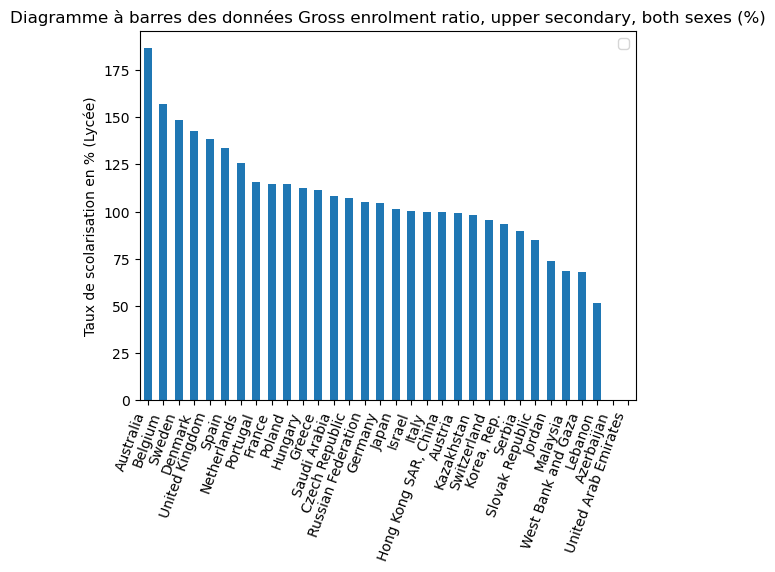

In [95]:
# Même représentation avec un diag en barres
variable = 'Gross enrolment ratio, upper secondary, both sexes (%)'
data_sorted = base_32PAYS_EdStatsData.sort_values(variable, ascending=False)

# Tracer un diagramme à barres à partir du DataFrame trié
ax = data_sorted.plot(kind='bar', y=variable)

# Afficher le titre et les étiquettes
ax.set_title(f'Diagramme à barres des données {variable}')
ax.set_xlabel(None)  # Retirer le nom de l'axe x
ax.set_ylabel("Taux de scolarisation en % (Lycée)")  # Nom de l'axe y

# Rotation des étiquettes et alignement à droite des étiquettes
ax.set_xticklabels(data_sorted.index, rotation=70, horizontalalignment='right') 
plt.legend([])

# Afficher le plot
plt.show()

Utiliser les variables suivantes pour remplacer les valeurs manquantes par la moyenne des plus proches voisins :
   - Population of the official age for upper secondary education, both sexes (number)
   - Internet users (per 100 people)

In [96]:
# Valeurs manquantes de la variable :
bool_na=base_32PAYS_EdStatsData[variable].isnull()
df_na=base_32PAYS_EdStatsData[bool_na]

pays_na=df_na.index
print(pays_na)      

Index(['Azerbaijan', 'United Arab Emirates'], dtype='object', name='Country Name')


In [97]:
# Pour chacune des données manquantes, on remplace par les données des voisins les plus proches sur les variables : 
variables_voisins = ['Population of the official age for upper secondary education, both sexes (number)','Internet users (per 100 people)']
# Ces 2 variables sont assez représentative du développement du pays et de sa taille
for pays in pays_na:
    df_trie=base_32PAYS_EdStatsData.sort_values(variables_voisins, ascending=False)
    # Calculer la moyenne mobile des 10 voisins les plus proches pour chaque pays
    moyenne_voisins = base_32PAYS_EdStatsData[variable].rolling(window=10, min_periods=1).mean()
    # Remplacer les valeurs manquantes dans df_trie par la moyenne des 10 voisins les plus proches
    df_trie[variable] = df_trie[variable].fillna(moyenne_voisins)
    print(df_trie.loc[pays,variable])
    
base_32PAYS_EdStatsData_complete = df_trie

100.16574139065223
124.04718780517594


In [98]:
base_32PAYS_EdStatsData_complete.loc[pays_na,].head()

,Currency Unit,Region,Income Group,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
Country Name,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,New Azeri manat,Europe & Central Asia,Upper middle income,2.63466,24.730989,23.159731,100.165741,78.200000,1.25332,27.38983,...,1.163574,153621.0,843710.0,275965.0,9762274.0,5186.11,5622.51,6059.92,6405.52,6648.13
United Arab Emirates,U.A.E. dirham,Middle East & North Africa,High income: nonOECD,NaN,NaN,NaN,124.047188,90.600007,0.27261,3.42164,...,1.251759,NaN,NaN,256108.0,9269612.0,3247.96,3758.99,4317.82,4879.63,5401.68


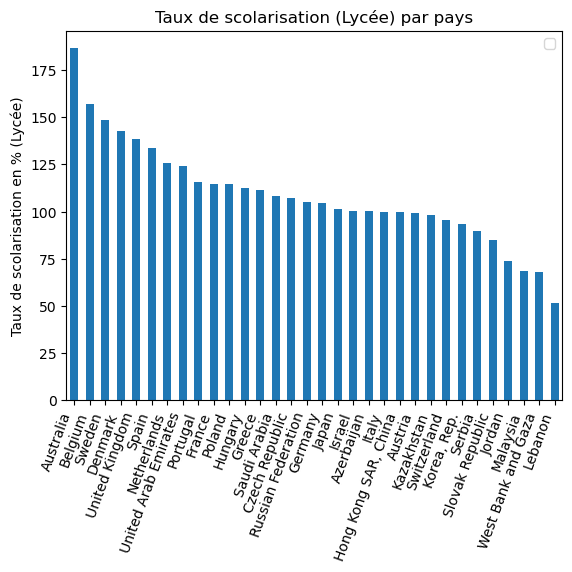

In [99]:
# Relancer le graphique sans les valeurs manquantes :
variable = 'Gross enrolment ratio, upper secondary, both sexes (%)'
data_sorted = base_32PAYS_EdStatsData_complete.sort_values(variable, ascending=False)
# plt.bar(height=data_sorted[variable], x=data_sorted.index)

# Tracer un diagramme à barres à partir du DataFrame trié
ax = data_sorted.plot(kind='bar', y=variable)

# Afficher le titre et les étiquettes
ax.set_title("Taux de scolarisation (Lycée) par pays")
ax.set_xlabel(None)  # Retirer le nom de l'axe x
ax.set_ylabel("Taux de scolarisation en % (Lycée)")  # Nom de l'axe y

# Rotation des étiquettes et alignement à droite des étiquettes
ax.set_xticklabels(data_sorted.index, rotation=70, horizontalalignment='right') 

# Supprimer la légende
plt.legend([])

# Afficher le plot
plt.show()

In [100]:
base_32PAYS_EdStatsData_complete['Gross enrolment ratio, upper secondary, both sexes (%)'].describe()

count     32.000000
mean     108.577117
std       27.227056
min       51.346310
25%       97.379122
50%      104.829441
75%      117.881935
max      186.427887
Name: Gross enrolment ratio, upper secondary, both sexes (%), dtype: float64

<Figure size 640x480 with 0 Axes>

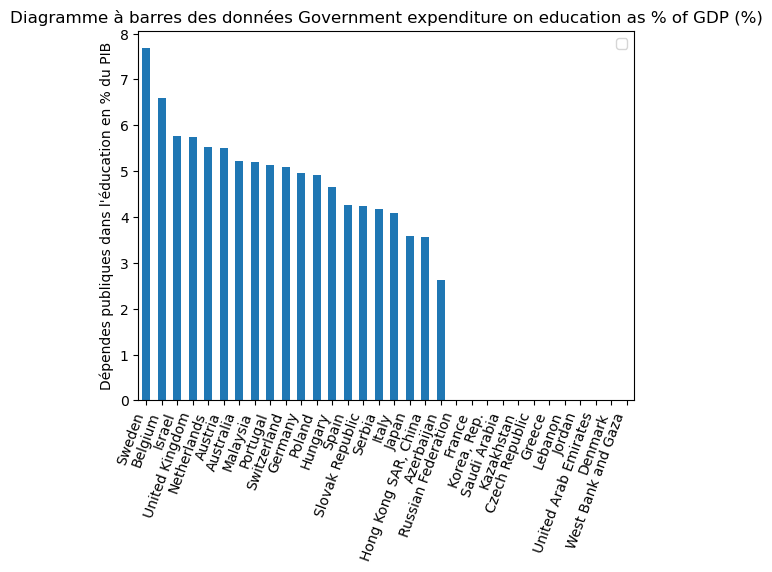

In [101]:
# Variable : 'Government expenditure on education as % of GDP (%)'
plt.close()
plt.figure()
variable = 'Government expenditure on education as % of GDP (%)'
data_sorted = base_32PAYS_EdStatsData_complete.sort_values(variable, ascending=False)

# Tracer un diagramme à barres à partir du DataFrame trié
ax = data_sorted.plot(kind='bar', y=variable)

# Afficher le titre et les étiquettes
ax.set_title(f'Diagramme à barres des données {variable}')
ax.set_xlabel(None)  # Retirer le nom de l'axe x
ax.set_ylabel("Dépendes publiques dans l'éducation en % du PIB")  # Nom de l'axe y

# Rotation des étiquettes et alignement à droite des étiquettes
ax.set_xticklabels(data_sorted.index, rotation=70, horizontalalignment='right') 

plt.legend([])

# Afficher le plot
plt.show()

In [102]:
# Valeurs manquantes de la variable :
bool_na=base_32PAYS_EdStatsData_complete[variable].isnull()
df_na=base_32PAYS_EdStatsData_complete[bool_na]

pays_na=df_na.index
print(pays_na)      

Index(['Russian Federation', 'France', 'Korea, Rep.', 'Saudi Arabia',
       'Kazakhstan', 'Czech Republic', 'Greece', 'Lebanon', 'Jordan',
       'United Arab Emirates', 'Denmark', 'West Bank and Gaza'],
      dtype='object', name='Country Name')


In [103]:
# Pour chacune des données manquantes, on remplace par les données des voisins les plus proches sur les variables : 
variable = 'Government expenditure on education as % of GDP (%)'
variables_voisins = ['Population of the official age for upper secondary education, both sexes (number)','Internet users (per 100 people)']
# Ces 2 variables sont assez représentative du développement du pays et de sa taille
for pays in pays_na:
    df_trie=base_32PAYS_EdStatsData_complete.sort_values(variables_voisins, ascending=False)
    # Calculer la moyenne mobile des 10 voisins les plus proches pour chaque pays
    moyenne_voisins = base_32PAYS_EdStatsData_complete[variable].rolling(window=10, min_periods=1).mean()
    # Remplacer les valeurs manquantes dans df_trie par la moyenne des 10 voisins les plus proches
    df_trie[variable] = df_trie[variable].fillna(moyenne_voisins)
    print(df_trie.loc[pays,variable])

moyenne_West_Bank_and_Gaza = df_trie[variable].rolling(window=10, min_periods=1).mean()
# Remplacer les valeurs manquantes dans df_trie par la moyenne des 10 voisins les plus proches
df_trie[variable] = df_trie[variable].fillna(moyenne_West_Bank_and_Gaza)
base_32PAYS_EdStatsData_complete = df_trie

4.46872671445211
4.710860013961792
4.710860013961792
4.710860013961792
5.2864116032918265
5.196981588999429
5.7711527688162665
5.635488192240398
5.555364847183228
5.034929871559144
3.9494279861450194
3.6553875207901


In [104]:
base_32PAYS_EdStatsData_complete.loc[pays_na,].head()

,Currency Unit,Region,Income Group,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
Country Name,,,,,,,,,,,,,,,,,,,,,
Russian Federation,Russian ruble,Europe & Central Asia,High income: nonOECD,4.468727,4.153800,78.653374,105.064331,76.409085,NaN,NaN,...,0.170245,1507245.0,8894383.0,2686929.0,144342396.0,82161.19,82777.12,83484.59,83292.99,81952.53
France,Euro,Europe & Central Asia,High income: OECD,4.710860,4.468510,64.390472,114.752960,85.622200,1.13882,3.033640,...,0.407491,742239.0,3709990.0,2264305.0,66896109.0,23245.61,24358.47,25244.06,25860.42,26211.87
"Korea, Rep.",Korean won,East Asia & Pacific,High income: OECD,4.710860,NaN,94.210213,93.631653,92.716545,NaN,NaN,...,0.451318,NaN,3522237.0,1975739.0,51245707.0,16471.65,16021.89,15773.81,15322.01,14677.54
Saudi Arabia,Saudi Arabian riyal,Middle East & North Africa,High income: nonOECD,4.710860,NaN,61.112019,108.431297,73.750904,0.39600,7.409750,...,2.251422,NaN,2449158.0,1548089.0,32275687.0,6775.67,8128.36,9519.14,10608.15,11644.07
Kazakhstan,Kazakh tenge,Europe & Central Asia,Upper middle income,5.286412,77.699471,48.475330,98.015297,76.800000,3.53849,22.645691,...,1.431251,269321.0,1500559.0,485816.0,17797032.0,7832.22,8356.16,8798.32,9089.04,9246.38


<Figure size 640x480 with 0 Axes>

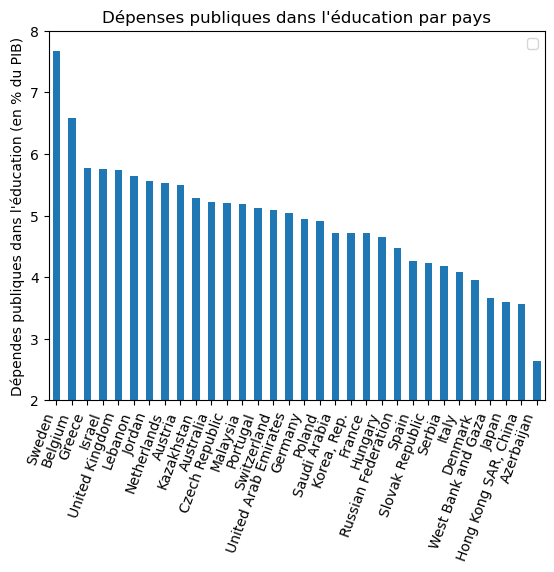

In [105]:
# Variable : 'Government expenditure on education as % of GDP (%)'
plt.close()
plt.figure()
variable = 'Government expenditure on education as % of GDP (%)'
data_sorted = base_32PAYS_EdStatsData_complete.sort_values(variable, ascending=False)

# Tracer un diagramme à barres à partir du DataFrame trié
ax = data_sorted.plot(kind='bar', y=variable)

# Afficher le titre et les étiquettes
ax.set_title("Dépenses publiques dans l'éducation par pays")
ax.set_xlabel(None)  # Retirer le nom de l'axe x
ax.set_ylabel("Dépendes publiques dans l'éducation (en % du PIB)")  # Nom de l'axe y

# Rotation des étiquettes et alignement à droite des étiquettes
ax.set_xticklabels(data_sorted.index, rotation=70, horizontalalignment='right') 

# Supprimer la légende
plt.legend([])
# Ajuster l'échelle de l'axe
plt.ylim(2, 8)

# Afficher le plot
plt.show()

In [106]:
base_32PAYS_EdStatsData_complete['Government expenditure on education as % of GDP (%)'].describe()

count    32.000000
mean      4.912430
std       0.957758
min       2.634660
25%       4.262837
50%       4.993560
75%       5.507007
max       7.675090
Name: Government expenditure on education as % of GDP (%), dtype: float64

<Figure size 640x480 with 0 Axes>

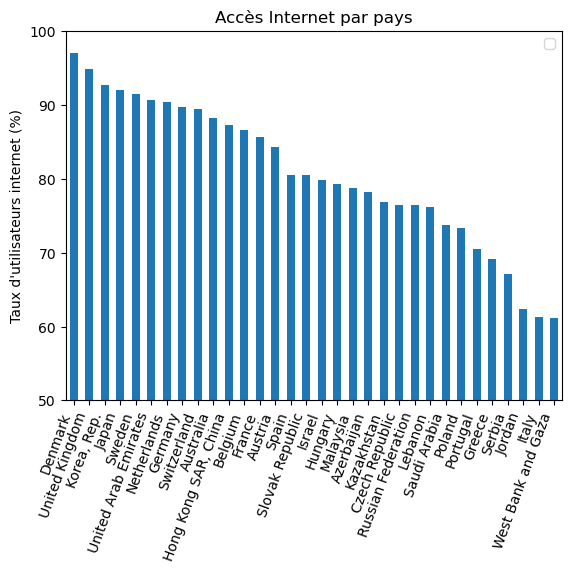

In [107]:
# Variable : Internet users (per 100 people)
plt.close()
plt.figure()
variable = 'Internet users (per 100 people)'
data_sorted = base_32PAYS_EdStatsData_complete.sort_values(variable, ascending=False)

# Tracer un diagramme à barres à partir du DataFrame trié
ax = data_sorted.plot(kind='bar', y=variable)

# Afficher le titre et les étiquettes
ax.set_title("Accès Internet par pays")
ax.set_xlabel(None)  # Retirer le nom de l'axe x
ax.set_ylabel("Taux d'utilisateurs internet (%)")  # Nom de l'axe y

# Rotation des étiquettes et alignement à droite des étiquettes
ax.set_xticklabels(data_sorted.index, rotation=70, horizontalalignment='right') 

# Supprimer la légende
plt.legend([])
# Ajuster l'échelle de l'axe
plt.ylim(50, 100)

# Afficher le plot
plt.show()

In [108]:
base_32PAYS_EdStatsData_complete['Internet users (per 100 people)'].describe()

count    32.000000
mean     80.666263
std       9.969860
min      61.178385
25%      75.520226
50%      80.127346
75%      89.465951
max      96.967785
Name: Internet users (per 100 people), dtype: float64

<b> Prio 2 : croisement de ces indicateurs entre eux pour mettre en avant des pays à fort potentiel </b> 

C:\Users\druar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


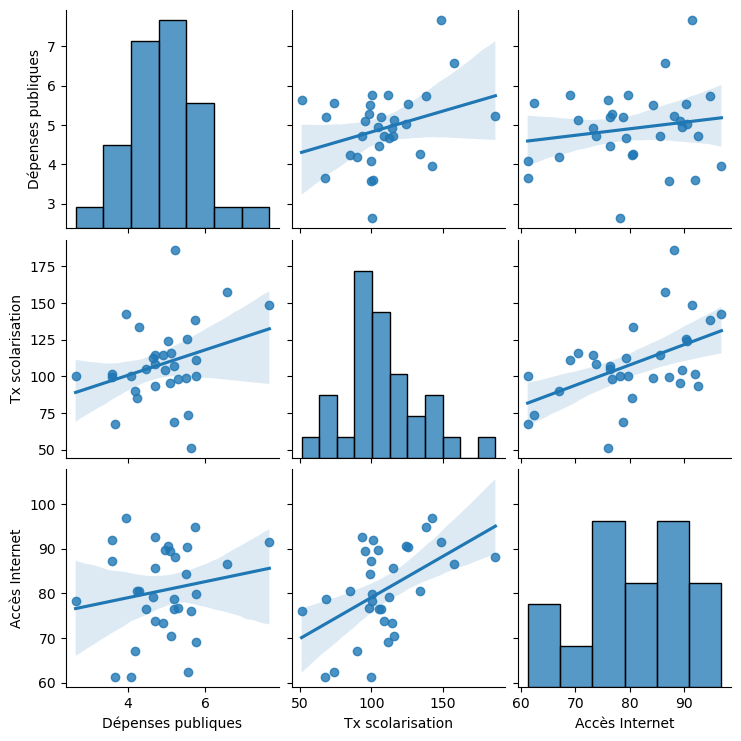

In [109]:
# Analyse de corrélation entre les 3 indicateurs priorisés
var_quanti = ['Government expenditure on education as % of GDP (%)',
'Gross enrolment ratio, upper secondary, both sexes (%)',
'Internet users (per 100 people)']

# Retirer les pays les plus excentrés pour une meilleure visualisation
liste_a_retirer = ['United States']
mask1 = ~base_32PAYS_EdStatsData_complete.index.isin(liste_a_retirer)
df_sansPays = base_32PAYS_EdStatsData_complete[mask1]

df_corr = df_sansPays[var_quanti]

# Renommer les variables pour une meilleure lisibilité des graphiques
df_renamed = df_corr.rename(columns={var_quanti[0]: 'Dépenses publiques', var_quanti[1]: 'Tx scolarisation',var_quanti[2]:'Accès Internet'})

sns.pairplot(df_renamed, kind='reg')
# kind='reg' permet d'afficher une régression linéaire sur le plot

# Afficher le graphique
plt.show()

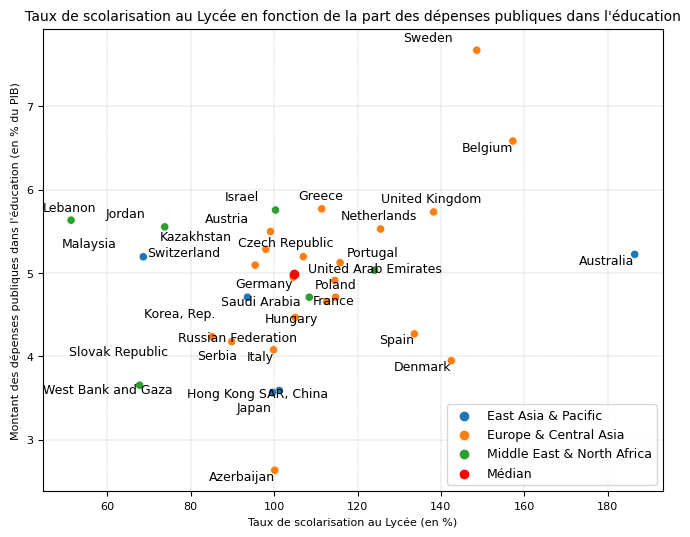

In [110]:
# Ajuster la taille de la figure
plt.figure(figsize=(8,6))

x=base_32PAYS_EdStatsData_complete['Gross enrolment ratio, upper secondary, both sexes (%)']
y=base_32PAYS_EdStatsData_complete['Government expenditure on education as % of GDP (%)']
# plt.scatter(x, y)
sns.scatterplot(data=base_32PAYS_EdStatsData_complete, x='Gross enrolment ratio, upper secondary, both sexes (%)', y='Government expenditure on education as % of GDP (%)', hue='Region')

# Calculer le point médian
x_median = median(x)
y_median = median(y)

# Annoter chaque point avec le nom du pays
texts = [plt.text(x[i], y[i], base_32PAYS_EdStatsData_complete.index[i], ha='right', va='bottom',fontsize=9) for i in range(len(x))]
adjust_text(texts)
# Package installé dans l'environnement via anaconda prompt : conda install -c conda-forge adjusttext 

# Tracer le point médian
plt.scatter(x_median, y_median, color='red', label='Médian')

# Adapter le rendu du graphique
plt.title("Taux de scolarisation au Lycée en fonction de la part des dépenses publiques dans l'éducation",fontsize=10)
plt.xlabel("Taux de scolarisation au Lycée (en %)", fontsize=8)  # Nom de l'axe x
plt.ylabel("Montant des dépenses publiques dans l'éducation (en % du PIB)", fontsize=8)  # Nom de l'axe y
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(color='gray', linestyle='-.', linewidth=0.2)
plt.legend(loc='lower right',fontsize=9)

plt.show()

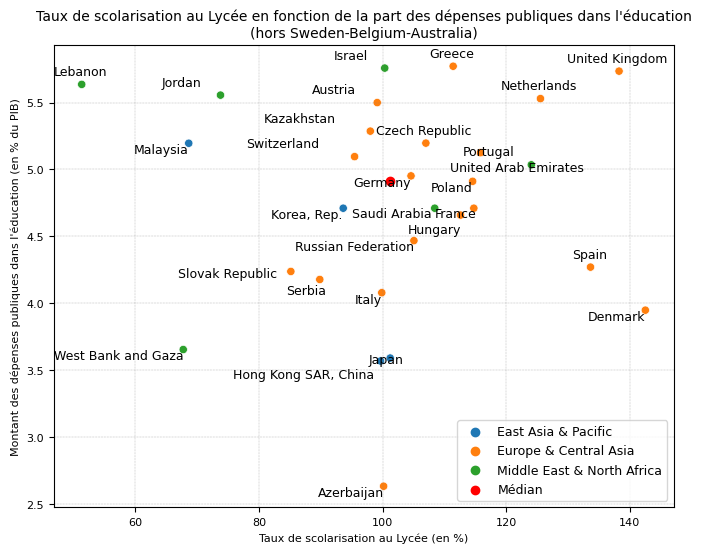

In [111]:
# Retirer les pays les plus excentrés pour une meilleure visualisation
liste_grands_pays = ['Sweden','Belgium','Australia']
mask1 = ~base_32PAYS_EdStatsData_complete.index.isin(liste_grands_pays)
df_sansPays = base_32PAYS_EdStatsData_complete[mask1]

plt.figure(figsize=(8, 6))

x=df_sansPays['Gross enrolment ratio, upper secondary, both sexes (%)']
y=df_sansPays['Government expenditure on education as % of GDP (%)']
# Pour adapter la taille des points
# size=df_sansPays['Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030']

# Tracer le nuage de points avec la variable de taille
sns.scatterplot(data=df_sansPays, x='Gross enrolment ratio, upper secondary, both sexes (%)', y='Government expenditure on education as % of GDP (%)', hue='Region')

# Calculer le point médian
x_median = median(x)
y_median = median(y)

# Annoter chaque point avec le nom du pays
texts = [plt.text(x[i], y[i], df_sansPays.index[i], ha='right', va='bottom',fontsize=9) for i in range(len(x))]
adjust_text(texts)
# Package installé dans l'environnement via anaconda prompt : conda install -c conda-forge adjusttext 

# Tracer le point médian
plt.scatter(x_median, y_median, color='red', label='Médian')

# Adapter le rendu du graphique
plt.title("Taux de scolarisation au Lycée en fonction de la part des dépenses publiques dans l'éducation\n(hors Sweden-Belgium-Australia)",fontsize=10)
plt.xlabel("Taux de scolarisation au Lycée (en %)", fontsize=8)  # Nom de l'axe x
plt.ylabel("Montant des dépenses publiques dans l'éducation (en % du PIB)", fontsize=8)  # Nom de l'axe y
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(color='gray', linestyle='-.', linewidth=0.2)
plt.legend(loc='lower right',fontsize=9)

plt.show()

In [112]:
liste_pays_potentiel = ['Lebanon','Jordan','Malaysia','Israel','Austria','Switzerland','Kazakhstan']
df_pays_potentiel = base_32PAYS_EdStatsData_complete[base_32PAYS_EdStatsData_complete.index.isin(liste_pays_potentiel)]
df_pays_potentiel.head(7)

,Currency Unit,Region,Income Group,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040
Country Name,,,,,,,,,,,,,,,,,,,,,
Malaysia,Malaysian ringgit,East Asia & Pacific,Upper middle income,5.195930,0.511040,27.604839,68.652786,78.788310,1.27014,12.549880,...,1.499323,571192.0,3115917.0,2276745.0,31187265.0,10969.93,12286.41,13535.72,14666.81,15636.96
Kazakhstan,Kazakh tenge,Europe & Central Asia,Upper middle income,5.286412,77.699471,48.475330,98.015297,76.800000,3.53849,22.645691,...,1.431251,269321.0,1500559.0,485816.0,17797032.0,7832.22,8356.16,8798.32,9089.04,9246.38
Israel,Israeli new shekel,Middle East & North Africa,High income: OECD,5.757270,14.503880,66.181038,100.345070,79.778791,0.53084,17.224079,...,1.973220,112956.0,569577.0,368046.0,8547100.0,2256.79,2695.63,3198.12,3734.93,4300.35
Switzerland,Swiss franc,Europe & Central Asia,High income: OECD,5.096080,13.237830,57.229530,95.470596,89.405568,1.12477,9.688160,...,1.077221,98634.0,505980.0,367576.0,8372098.0,3660.29,3786.88,3911.56,4019.40,4108.97
Austria,Euro,Europe & Central Asia,High income: OECD,5.499550,6.953140,79.998642,99.129738,84.323331,1.50124,13.672060,...,1.314007,289523.0,526540.0,366376.0,8747358.0,3693.80,3764.42,3807.36,3826.57,3818.76
Lebanon,Lebanese pound,Middle East & North Africa,Upper middle income,5.635488,NaN,42.772831,51.346310,76.110000,1.58416,4.158480,...,2.617574,NaN,535279.0,309253.0,6006668.0,805.73,900.13,988.05,1070.22,1144.47
Jordan,Jordanian dinar,Middle East & North Africa,Upper middle income,5.555365,NaN,NaN,73.788834,62.302193,NaN,NaN,...,3.185855,NaN,680282.0,291742.0,9455802.0,1654.37,1991.27,2310.02,2616.32,2935.20


<Figure size 640x480 with 0 Axes>

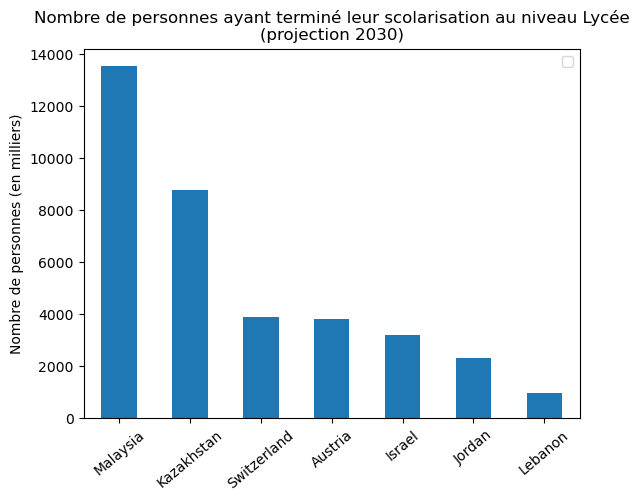

In [113]:
# Variable : 
plt.close()
plt.figure()
variable = 'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030'
data_sorted = df_pays_potentiel.sort_values(variable, ascending=False)

# Tracer un diagramme à barres à partir du DataFrame trié
ax = data_sorted.plot(kind='bar', y=variable)

# Afficher le titre et les étiquettes
ax.set_title("Nombre de personnes ayant terminé leur scolarisation au niveau Lycée\n(projection 2030)")
ax.set_xlabel(None)  # Retirer le nom de l'axe x
ax.set_ylabel("Nombre de personnes (en milliers)")  # Nom de l'axe y

# Rotation des étiquettes et alignement à droite des étiquettes
ax.set_xticklabels(data_sorted.index, rotation=40) 

# Supprimer la légende
plt.legend([])

# Afficher le plot
plt.show()

<Figure size 640x480 with 0 Axes>

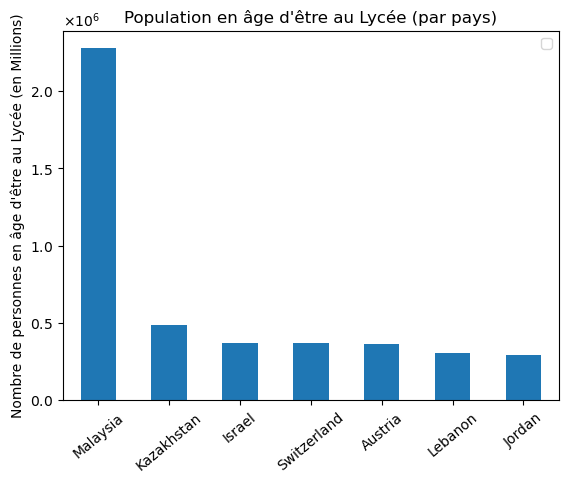

In [114]:
# Variable : 
plt.close()
plt.figure()
variable = 'Population of the official age for upper secondary education, both sexes (number)'
data_sorted = df_pays_potentiel.sort_values(variable, ascending=False)

# Tracer un diagramme à barres à partir du DataFrame trié
ax = data_sorted.plot(kind='bar', y=variable)

# Afficher le titre et les étiquettes
ax.set_title("Population en âge d'être au Lycée (par pays)")
ax.set_xlabel(None)  # Retirer le nom de l'axe x
ax.set_ylabel("Nombre de personnes en âge d'être au Lycée (en Millions)")  # Nom de l'axe y

# Rotation des étiquettes et alignement à droite des étiquettes
ax.set_xticklabels(data_sorted.index, rotation=40) 

# Utiliser ScalarFormatter pour formater les chiffres en notation scientifique
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))  # Pour forcer la notation scientifique, et afficher en format 10^6

# Supprimer la légende
plt.legend([])

# Afficher le plot
plt.show()

In [115]:
# Faire des courbes avec les projections en nb : Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
# Modifier l'échelle des variables 
variables = ['Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2020',
       'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2025',
       'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2030',
       'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2035',
       'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total 2040']
df_proj = df_pays_potentiel[variables].copy()
df_proj.rename(columns={variables[0]: '2020'}, inplace=True)
df_proj['2020']=df_proj['2020']*1000
df_proj.rename(columns={variables[1]: '2025'}, inplace=True)
df_proj['2025']=df_proj['2025']*1000
df_proj.rename(columns={variables[2]: '2030'}, inplace=True)
df_proj['2030']=df_proj['2030']*1000
df_proj.rename(columns={variables[3]: '2035'}, inplace=True)
df_proj['2035']=df_proj['2035']*1000
df_proj.rename(columns={variables[4]: '2040'}, inplace=True)
df_proj['2040']=df_proj['2040']*1000

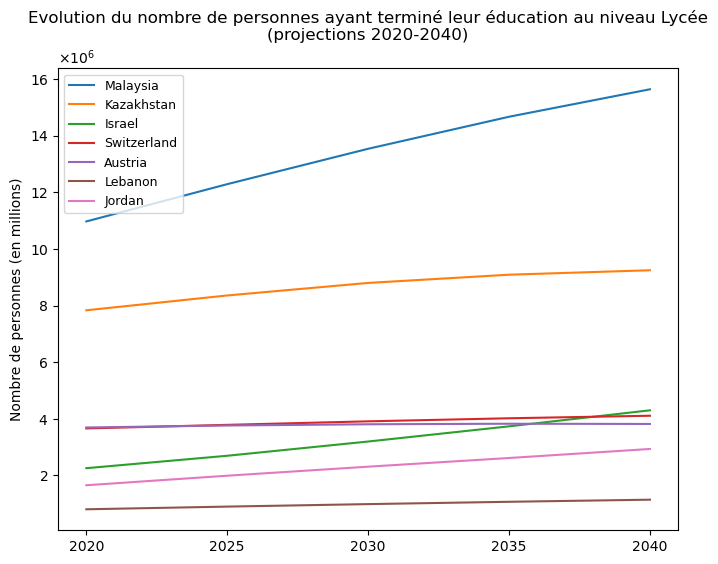

In [116]:
# Affichage pour ces pays de l'évolution du nombre de personnes ayant terminé leur éducation au niveau Lycée
# 1 courbe = un pays, un point = une année de projection
plt.figure(figsize=(8, 6))

for pays in df_proj.index:
    courbe_pays = df_proj.loc[df_pays_potentiel.index==pays,:]
    plt.plot(courbe_pays.transpose(), label=pays)

plt.legend(loc='upper left',fontsize=9)
# Afficher le titre et les étiquettes
plt.title("Evolution du nombre de personnes ayant terminé leur éducation au niveau Lycée\n(projections 2020-2040)")
plt.ylabel("Nombre de personnes (en millions)")  # Nom de l'axe y

# Utiliser ScalarFormatter pour formater les chiffres en notation scientifique
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(6, 6))  # Pour forcer la notation scientifique, et afficher en format 10^6

# Afficher le plot
plt.show()